In [1]:
%env CONDA_PREFIX

'C:\\Users\\ai41\\anaconda3\\envs\\tensorflow'

In [2]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

In [3]:
import cv2   #opencv
import imutils

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [5]:
#IMG_DIR="d:/Ai/project1/imgs/train"
IMG_DIR="d:/Ai/project1/"
df = pd.read_csv(IMG_DIR+"driver_imgs_list.csv")
df['img'] = IMG_DIR + 'imgs/train/' + df['classname'] + '/' + df['img']
x = df["classname"]
y = df["img"]
df = df.sample(frac=1)
print(type(df))
print(type(x))
df.head(20)
df_train = df[:14000]
df_test = df[14000:]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [6]:
df_test

,subject,classname,img
19528,p066,c0,d:/Ai/project1/imgs/train/c0/img_87085.jpg
6259,p022,c5,d:/Ai/project1/imgs/train/c5/img_90980.jpg
11862,p042,c8,d:/Ai/project1/imgs/train/c8/img_96673.jpg
20532,p072,c1,d:/Ai/project1/imgs/train/c1/img_32747.jpg
9378,p035,c1,d:/Ai/project1/imgs/train/c1/img_100230.jpg
...,...,...,...
4904,p021,c4,d:/Ai/project1/imgs/train/c4/img_44439.jpg
4505,p021,c0,d:/Ai/project1/imgs/train/c0/img_78051.jpg
16579,p052,c4,d:/Ai/project1/imgs/train/c4/img_63655.jpg
2775,p015,c4,d:/Ai/project1/imgs/train/c4/img_100778.jpg


In [8]:
df_test.head(25)

,subject,classname,img
19528,p066,c0,d:/Ai/project1/imgs/train/c0/img_87085.jpg
6259,p022,c5,d:/Ai/project1/imgs/train/c5/img_90980.jpg
11862,p042,c8,d:/Ai/project1/imgs/train/c8/img_96673.jpg
20532,p072,c1,d:/Ai/project1/imgs/train/c1/img_32747.jpg
9378,p035,c1,d:/Ai/project1/imgs/train/c1/img_100230.jpg
10639,p039,c8,d:/Ai/project1/imgs/train/c8/img_11769.jpg
9361,p035,c0,d:/Ai/project1/imgs/train/c0/img_22011.jpg
11773,p042,c6,d:/Ai/project1/imgs/train/c6/img_82291.jpg
15079,p050,c6,d:/Ai/project1/imgs/train/c6/img_11611.jpg
2389,p014,c9,d:/Ai/project1/imgs/train/c9/img_92682.jpg


In [9]:
df_train

,subject,classname,img
21445,p075,c8,d:/Ai/project1/imgs/train/c8/img_45868.jpg
12399,p045,c5,d:/Ai/project1/imgs/train/c5/img_43618.jpg
2396,p014,c9,d:/Ai/project1/imgs/train/c9/img_99761.jpg
14037,p049,c5,d:/Ai/project1/imgs/train/c5/img_69055.jpg
17778,p061,c0,d:/Ai/project1/imgs/train/c0/img_79017.jpg
...,...,...,...
8608,p026,c4,d:/Ai/project1/imgs/train/c4/img_87011.jpg
9968,p035,c7,d:/Ai/project1/imgs/train/c7/img_23059.jpg
15953,p051,c6,d:/Ai/project1/imgs/train/c6/img_96378.jpg
4796,p021,c3,d:/Ai/project1/imgs/train/c3/img_8363.jpg


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(rescale=1./255,                  #이미지 데이터 /255 : Minmaxscaling
                                      zoom_range=0.1,    #원래 영상에 +-10%(0.9~1.1) 정도 크기를 재조정해라
                                      width_shift_range=0.1, #좌우로 약간씩 (+-10%)이동한 영상
                                      height_shift_range=0.1,   #위아래로 약간씩(+-10%) 이동한 영상 
                                      validation_split=0.2)    
                                      #학습 data 80%, 테스트 데이터 20% 변형된 데이터가 나올 수 있게 해서 학습
train_data = datagen.flow_from_dataframe(df_train,
                                         x_col='img',
                                         y_col = 'classname',
                                        target_size=(123,155),  #타겟 사이즈
                                        batch_size=16,      #배치 사이즈 16장 추출
                                        class_mode = 'categorical',   #출력 노드가 one-hot encoding
                                       subset = 'training')   #트레이닝용 80%

valid_data = datagen.flow_from_dataframe(df_train,
                                         x_col='img',
                                         y_col = 'classname',
                                         target_size=(123,155),
                                     batch_size=16,
                                     class_mode = 'categorical',   #one-hot encoding
                                     subset = 'validation')   #validation용


datagen = ImageDataGenerator(rescale=1./255,                  
                                      zoom_range=0.1,    
                                      width_shift_range=0.1, 
                                      height_shift_range=0.1,
                                      validation_split=0.2)   
                            
test_data = datagen.flow_from_dataframe(df_test,
                                         x_col='img',
                                         y_col = 'classname',
                                        target_size=(123,155),  
                                        batch_size=16,      
                                        class_mode = 'categorical',   
                                       subset = 'training')  

Found 11200 validated image filenames belonging to 10 classes.
Found 2800 validated image filenames belonging to 10 classes.
Found 8424 validated image filenames belonging to 10 classes.


In [12]:
IMG_DIR="d:/Ai/project1/imgs/train/"

In [15]:
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

model = Sequential()
#conv1
model.add(Conv2D(32, (5, 5), 2, input_shape=(123,155,3),      
                activation="relu"))
#maxpooling 1
model.add(MaxPooling2D(pool_size=(2,2)))
#conv2
model.add(Conv2D(64, (3,3), activation="relu"))
#maxp 2
model.add(MaxPooling2D(pool_size=(2,2)))  #conv1>mp1>conv2>mp2>flatten해서>fc1>fc2
model.add(Dropout(0.25))   
#탈락율이 25% : 다 하면 너무 학습 패턴에 맞추어진다. (과적합방지)
#어떤 뉴런은 탈락시킨다 = 이 뉴런은 수정안하고 나머지 75%는 수정, 선택되는 뉴런은 할때마다 달라진다

model.add(Conv2D(128,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))   

model.add(Flatten())
model.add(Dense(units=30, activation="relu"))  
model.add(Dense(units=15, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy",  #one-hot encoding
             optimizer="adam",
             metrics=["accuracy"])
#모델 저장 폴더 설정
MODEL_DIR = "d:/Ai/project1/"
if not os.path.exists (MODEL_DIR):
    os.mkdir(MODEL_DIR)                          #().mkdir :폴더 생성
                                                                    
#모델 저장 조건 설정            #파일이름에는 빈칸이 들어가면 안된다
modelfile = MODEL_DIR+'CNN_project1_best.h5'   
checkpointer = ModelCheckpoint(filepath=modelfile,      
                              moniter="val_loss", verbose=1,
                              save_best_only=True) 

#학습의 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor="val_loss", patience=20)


#모델 학습 및 저장  
fit_history = model.fit(train_data, 
                        epochs=200, verbose=1, 
                        validation_data=valid_data,
                        callbacks=[early_stopping_callback, checkpointer])

Epoch 1/200
700/700 [==============================] - ETA: 0s - loss: 2.0815 - accuracy: 0.1837
Epoch 00001: val_loss improved from inf to 1.73403, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 101s 144ms/step - loss: 2.0815 - accuracy: 0.1837 - val_loss: 1.7340 - val_accuracy: 0.3214
Epoch 2/200
700/700 [==============================] - ETA: 0s - loss: 1.5518 - accuracy: 0.3849
Epoch 00002: val_loss improved from 1.73403 to 1.38464, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 103s 147ms/step - loss: 1.5518 - accuracy: 0.3849 - val_loss: 1.3846 - val_accuracy: 0.4189
Epoch 3/200
700/700 [==============================] - ETA: 0s - loss: 1.3018 - accuracy: 0.4848
Epoch 00003: val_loss improved from 1.38464 to 1.18456, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 101s 144ms/step - loss: 1.3018 - accuracy: 0.4848 - val_loss: 1.1846 - val_a

Epoch 26/200
700/700 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9361
Epoch 00026: val_loss improved from 0.11265 to 0.11106, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 99s 141ms/step - loss: 0.1959 - accuracy: 0.9361 - val_loss: 0.1111 - val_accuracy: 0.9707
Epoch 27/200
700/700 [==============================] - ETA: 0s - loss: 0.1852 - accuracy: 0.9403
Epoch 00027: val_loss did not improve from 0.11106
700/700 [==============================] - 97s 139ms/step - loss: 0.1852 - accuracy: 0.9403 - val_loss: 0.1355 - val_accuracy: 0.9629
Epoch 28/200
700/700 [==============================] - ETA: 0s - loss: 0.1599 - accuracy: 0.9496
Epoch 00028: val_loss improved from 0.11106 to 0.10801, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 98s 140ms/step - loss: 0.1599 - accuracy: 0.9496 - val_loss: 0.1080 - val_accuracy: 0.9711
Epoch 29/200
700/700 [===============

Epoch 54/200
700/700 [==============================] - ETA: 0s - loss: 0.1183 - accuracy: 0.9629
Epoch 00054: val_loss did not improve from 0.06224
700/700 [==============================] - 100s 143ms/step - loss: 0.1183 - accuracy: 0.9629 - val_loss: 0.0629 - val_accuracy: 0.9829
Epoch 55/200
700/700 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9629
Epoch 00055: val_loss did not improve from 0.06224
700/700 [==============================] - 97s 138ms/step - loss: 0.1180 - accuracy: 0.9629 - val_loss: 0.0638 - val_accuracy: 0.9825
Epoch 56/200
700/700 [==============================] - ETA: 0s - loss: 0.1113 - accuracy: 0.9653
Epoch 00056: val_loss improved from 0.06224 to 0.05831, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 100s 143ms/step - loss: 0.1113 - accuracy: 0.9653 - val_loss: 0.0583 - val_accuracy: 0.9839
Epoch 57/200
700/700 [==============================] - ETA: 0s - loss: 0.1052 - accuracy: 0

Epoch 111/200
700/700 [==============================] - ETA: 0s - loss: 0.0753 - accuracy: 0.9767
Epoch 00111: val_loss improved from 0.03569 to 0.03059, saving model to d:/Ai/project1\CNN_project1_best.h5
700/700 [==============================] - 97s 139ms/step - loss: 0.0753 - accuracy: 0.9767 - val_loss: 0.0306 - val_accuracy: 0.9907
Epoch 112/200
700/700 [==============================] - ETA: 0s - loss: 0.0759 - accuracy: 0.9758
Epoch 00112: val_loss did not improve from 0.03059
700/700 [==============================] - 97s 139ms/step - loss: 0.0759 - accuracy: 0.9758 - val_loss: 0.0429 - val_accuracy: 0.9882
Epoch 113/200
700/700 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9766
Epoch 00113: val_loss did not improve from 0.03059
700/700 [==============================] - 97s 139ms/step - loss: 0.0751 - accuracy: 0.9766 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 114/200
700/700 [==============================] - ETA: 0s - loss: 0.0661 - accuracy:

In [13]:
fit_history.history.keys()

NameError: name 'fit_history' is not defined

In [18]:
def display_training_curves(training, validation, title, subplot):    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.grid()
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

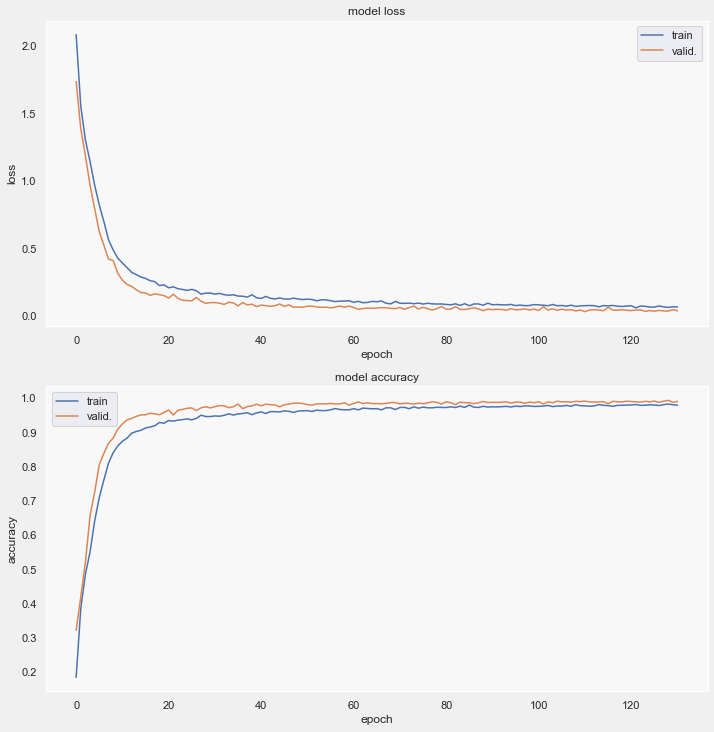

In [19]:
display_training_curves(
    fit_history.history['loss'], 
    fit_history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    fit_history.history['accuracy'], 
    fit_history.history['val_accuracy'], 
    'accuracy', 212)

In [14]:
from tensorflow.keras.models import load_model
MODEL_DIR = "d:/Ai/project1/"
modelfile = MODEL_DIR+'CNN_project1_best.h5'
model = load_model(modelfile)

In [59]:
from tensorflow.keras.models import load_model
MODEL_DIR = "d:/Ai/project1/"
modelfile = MODEL_DIR+'CNN_project1_best.h5'
model = load_model(modelfile)

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 60, 76, 32)        2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 38, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 36, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 18, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 18, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 8, 128)        

In [15]:
test_data

In [16]:
max_val_list=[]
y_pred_list=[]

for idx, fname in enumerate(df_test['img'] ):
    path=fname
    print(idx, ":", path, end ="==>")
    #print(path)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
    image = cv2.resize(image, (155, 123))
    image = image / 255.
    pred = model.predict(np.array([image]))
    max_val = np.max(pred[0])
    y_pred = np.argmax(pred[0]) 
    max_val_list.append(max_val)
    y_pred_list.append(y_pred)
    print(y_pred, "[",  int(df_test.iloc[idx, 1][-1]),"]", '%.2f' %max_val)
else :
    print(len(max_val_list), len(y_pred_list))

0 : d:/Ai/project1/imgs/train/c0/img_87085.jpg==>0 [ 0 ] 0.99
1 : d:/Ai/project1/imgs/train/c5/img_90980.jpg==>5 [ 5 ] 1.00
2 : d:/Ai/project1/imgs/train/c8/img_96673.jpg==>8 [ 8 ] 1.00
3 : d:/Ai/project1/imgs/train/c1/img_32747.jpg==>1 [ 1 ] 1.00
4 : d:/Ai/project1/imgs/train/c1/img_100230.jpg==>1 [ 1 ] 0.89
5 : d:/Ai/project1/imgs/train/c8/img_11769.jpg==>8 [ 8 ] 1.00
6 : d:/Ai/project1/imgs/train/c0/img_22011.jpg==>0 [ 0 ] 1.00
7 : d:/Ai/project1/imgs/train/c6/img_82291.jpg==>6 [ 6 ] 1.00
8 : d:/Ai/project1/imgs/train/c6/img_11611.jpg==>6 [ 6 ] 1.00
9 : d:/Ai/project1/imgs/train/c9/img_92682.jpg==>9 [ 9 ] 1.00
10 : d:/Ai/project1/imgs/train/c6/img_43653.jpg==>6 [ 6 ] 1.00
11 : d:/Ai/project1/imgs/train/c4/img_72894.jpg==>4 [ 4 ] 1.00
12 : d:/Ai/project1/imgs/train/c9/img_68887.jpg==>9 [ 9 ] 1.00
13 : d:/Ai/project1/imgs/train/c1/img_34283.jpg==>1 [ 1 ] 0.91
14 : d:/Ai/project1/imgs/train/c3/img_612.jpg==>3 [ 3 ] 1.00
15 : d:/Ai/project1/imgs/train/c2/img_33108.jpg==>2 [ 2 ] 1.00
16 

134 : d:/Ai/project1/imgs/train/c0/img_81943.jpg==>0 [ 0 ] 1.00
135 : d:/Ai/project1/imgs/train/c4/img_72376.jpg==>4 [ 4 ] 1.00
136 : d:/Ai/project1/imgs/train/c7/img_13095.jpg==>7 [ 7 ] 1.00
137 : d:/Ai/project1/imgs/train/c3/img_75942.jpg==>3 [ 3 ] 1.00
138 : d:/Ai/project1/imgs/train/c6/img_6819.jpg==>6 [ 6 ] 1.00
139 : d:/Ai/project1/imgs/train/c4/img_49163.jpg==>4 [ 4 ] 1.00
140 : d:/Ai/project1/imgs/train/c5/img_76908.jpg==>5 [ 5 ] 1.00
141 : d:/Ai/project1/imgs/train/c9/img_68198.jpg==>9 [ 9 ] 1.00
142 : d:/Ai/project1/imgs/train/c2/img_55731.jpg==>2 [ 2 ] 1.00
143 : d:/Ai/project1/imgs/train/c2/img_15069.jpg==>2 [ 2 ] 1.00
144 : d:/Ai/project1/imgs/train/c9/img_11964.jpg==>9 [ 9 ] 1.00
145 : d:/Ai/project1/imgs/train/c3/img_27653.jpg==>3 [ 3 ] 1.00
146 : d:/Ai/project1/imgs/train/c1/img_75785.jpg==>1 [ 1 ] 1.00
147 : d:/Ai/project1/imgs/train/c6/img_79544.jpg==>6 [ 6 ] 1.00
148 : d:/Ai/project1/imgs/train/c9/img_9460.jpg==>9 [ 9 ] 1.00
149 : d:/Ai/project1/imgs/train/c9/img_889

267 : d:/Ai/project1/imgs/train/c3/img_66557.jpg==>3 [ 3 ] 1.00
268 : d:/Ai/project1/imgs/train/c0/img_71021.jpg==>0 [ 0 ] 1.00
269 : d:/Ai/project1/imgs/train/c0/img_43346.jpg==>0 [ 0 ] 1.00
270 : d:/Ai/project1/imgs/train/c6/img_46501.jpg==>6 [ 6 ] 1.00
271 : d:/Ai/project1/imgs/train/c2/img_3194.jpg==>2 [ 2 ] 1.00
272 : d:/Ai/project1/imgs/train/c5/img_70226.jpg==>5 [ 5 ] 1.00
273 : d:/Ai/project1/imgs/train/c4/img_26524.jpg==>4 [ 4 ] 1.00
274 : d:/Ai/project1/imgs/train/c5/img_20722.jpg==>5 [ 5 ] 1.00
275 : d:/Ai/project1/imgs/train/c6/img_73124.jpg==>6 [ 6 ] 1.00
276 : d:/Ai/project1/imgs/train/c4/img_101366.jpg==>4 [ 4 ] 1.00
277 : d:/Ai/project1/imgs/train/c5/img_86727.jpg==>5 [ 5 ] 1.00
278 : d:/Ai/project1/imgs/train/c3/img_101341.jpg==>3 [ 3 ] 1.00
279 : d:/Ai/project1/imgs/train/c5/img_2747.jpg==>5 [ 5 ] 1.00
280 : d:/Ai/project1/imgs/train/c9/img_39336.jpg==>9 [ 9 ] 1.00
281 : d:/Ai/project1/imgs/train/c5/img_64113.jpg==>5 [ 5 ] 1.00
282 : d:/Ai/project1/imgs/train/c3/img_7

395 : d:/Ai/project1/imgs/train/c6/img_72916.jpg==>6 [ 6 ] 1.00
396 : d:/Ai/project1/imgs/train/c9/img_19036.jpg==>9 [ 9 ] 1.00
397 : d:/Ai/project1/imgs/train/c8/img_55033.jpg==>8 [ 8 ] 1.00
398 : d:/Ai/project1/imgs/train/c2/img_8481.jpg==>2 [ 2 ] 1.00
399 : d:/Ai/project1/imgs/train/c2/img_88852.jpg==>2 [ 2 ] 1.00
400 : d:/Ai/project1/imgs/train/c0/img_95355.jpg==>0 [ 0 ] 1.00
401 : d:/Ai/project1/imgs/train/c2/img_58340.jpg==>2 [ 2 ] 1.00
402 : d:/Ai/project1/imgs/train/c8/img_58076.jpg==>8 [ 8 ] 0.87
403 : d:/Ai/project1/imgs/train/c4/img_80041.jpg==>4 [ 4 ] 1.00
404 : d:/Ai/project1/imgs/train/c8/img_66741.jpg==>8 [ 8 ] 0.98
405 : d:/Ai/project1/imgs/train/c7/img_72752.jpg==>7 [ 7 ] 1.00
406 : d:/Ai/project1/imgs/train/c6/img_93022.jpg==>6 [ 6 ] 1.00
407 : d:/Ai/project1/imgs/train/c2/img_71757.jpg==>2 [ 2 ] 1.00
408 : d:/Ai/project1/imgs/train/c6/img_18127.jpg==>6 [ 6 ] 1.00
409 : d:/Ai/project1/imgs/train/c5/img_38824.jpg==>5 [ 5 ] 1.00
410 : d:/Ai/project1/imgs/train/c8/img_98

525 : d:/Ai/project1/imgs/train/c2/img_3931.jpg==>2 [ 2 ] 1.00
526 : d:/Ai/project1/imgs/train/c4/img_53974.jpg==>4 [ 4 ] 1.00
527 : d:/Ai/project1/imgs/train/c6/img_35006.jpg==>6 [ 6 ] 1.00
528 : d:/Ai/project1/imgs/train/c5/img_76416.jpg==>5 [ 5 ] 1.00
529 : d:/Ai/project1/imgs/train/c9/img_99949.jpg==>9 [ 9 ] 0.99
530 : d:/Ai/project1/imgs/train/c2/img_56041.jpg==>2 [ 2 ] 1.00
531 : d:/Ai/project1/imgs/train/c3/img_41900.jpg==>3 [ 3 ] 1.00
532 : d:/Ai/project1/imgs/train/c6/img_94126.jpg==>6 [ 6 ] 1.00
533 : d:/Ai/project1/imgs/train/c9/img_14737.jpg==>9 [ 9 ] 1.00
534 : d:/Ai/project1/imgs/train/c4/img_101588.jpg==>4 [ 4 ] 1.00
535 : d:/Ai/project1/imgs/train/c7/img_32247.jpg==>7 [ 7 ] 1.00
536 : d:/Ai/project1/imgs/train/c9/img_93000.jpg==>9 [ 9 ] 1.00
537 : d:/Ai/project1/imgs/train/c5/img_11634.jpg==>5 [ 5 ] 1.00
538 : d:/Ai/project1/imgs/train/c6/img_79395.jpg==>6 [ 6 ] 1.00
539 : d:/Ai/project1/imgs/train/c2/img_54652.jpg==>2 [ 2 ] 1.00
540 : d:/Ai/project1/imgs/train/c2/img_7

654 : d:/Ai/project1/imgs/train/c3/img_92644.jpg==>3 [ 3 ] 1.00
655 : d:/Ai/project1/imgs/train/c2/img_4212.jpg==>2 [ 2 ] 1.00
656 : d:/Ai/project1/imgs/train/c3/img_83592.jpg==>3 [ 3 ] 1.00
657 : d:/Ai/project1/imgs/train/c9/img_31563.jpg==>9 [ 9 ] 1.00
658 : d:/Ai/project1/imgs/train/c3/img_26965.jpg==>3 [ 3 ] 1.00
659 : d:/Ai/project1/imgs/train/c5/img_90451.jpg==>5 [ 5 ] 1.00
660 : d:/Ai/project1/imgs/train/c7/img_18510.jpg==>7 [ 7 ] 1.00
661 : d:/Ai/project1/imgs/train/c2/img_4623.jpg==>2 [ 2 ] 1.00
662 : d:/Ai/project1/imgs/train/c1/img_41831.jpg==>1 [ 1 ] 1.00
663 : d:/Ai/project1/imgs/train/c0/img_11863.jpg==>0 [ 0 ] 1.00
664 : d:/Ai/project1/imgs/train/c3/img_20573.jpg==>3 [ 3 ] 1.00
665 : d:/Ai/project1/imgs/train/c3/img_64814.jpg==>3 [ 3 ] 1.00
666 : d:/Ai/project1/imgs/train/c5/img_88681.jpg==>5 [ 5 ] 1.00
667 : d:/Ai/project1/imgs/train/c9/img_64613.jpg==>9 [ 9 ] 1.00
668 : d:/Ai/project1/imgs/train/c7/img_75321.jpg==>7 [ 7 ] 1.00
669 : d:/Ai/project1/imgs/train/c0/img_678

784 : d:/Ai/project1/imgs/train/c7/img_49662.jpg==>7 [ 7 ] 1.00
785 : d:/Ai/project1/imgs/train/c3/img_71678.jpg==>3 [ 3 ] 1.00
786 : d:/Ai/project1/imgs/train/c4/img_45614.jpg==>4 [ 4 ] 1.00
787 : d:/Ai/project1/imgs/train/c1/img_70214.jpg==>1 [ 1 ] 1.00
788 : d:/Ai/project1/imgs/train/c1/img_75187.jpg==>1 [ 1 ] 1.00
789 : d:/Ai/project1/imgs/train/c1/img_36081.jpg==>1 [ 1 ] 1.00
790 : d:/Ai/project1/imgs/train/c3/img_33972.jpg==>3 [ 3 ] 1.00
791 : d:/Ai/project1/imgs/train/c4/img_40043.jpg==>4 [ 4 ] 1.00
792 : d:/Ai/project1/imgs/train/c9/img_59058.jpg==>9 [ 9 ] 1.00
793 : d:/Ai/project1/imgs/train/c3/img_61559.jpg==>3 [ 3 ] 1.00
794 : d:/Ai/project1/imgs/train/c3/img_36971.jpg==>3 [ 3 ] 1.00
795 : d:/Ai/project1/imgs/train/c6/img_27377.jpg==>6 [ 6 ] 1.00
796 : d:/Ai/project1/imgs/train/c9/img_91577.jpg==>9 [ 9 ] 1.00
797 : d:/Ai/project1/imgs/train/c2/img_51247.jpg==>2 [ 2 ] 1.00
798 : d:/Ai/project1/imgs/train/c8/img_4853.jpg==>8 [ 8 ] 0.86
799 : d:/Ai/project1/imgs/train/c9/img_58

912 : d:/Ai/project1/imgs/train/c6/img_92917.jpg==>6 [ 6 ] 1.00
913 : d:/Ai/project1/imgs/train/c3/img_14752.jpg==>3 [ 3 ] 1.00
914 : d:/Ai/project1/imgs/train/c2/img_21732.jpg==>2 [ 2 ] 1.00
915 : d:/Ai/project1/imgs/train/c3/img_43833.jpg==>3 [ 3 ] 1.00
916 : d:/Ai/project1/imgs/train/c7/img_16477.jpg==>7 [ 7 ] 1.00
917 : d:/Ai/project1/imgs/train/c6/img_87158.jpg==>6 [ 6 ] 1.00
918 : d:/Ai/project1/imgs/train/c2/img_81428.jpg==>2 [ 2 ] 1.00
919 : d:/Ai/project1/imgs/train/c3/img_86136.jpg==>3 [ 3 ] 1.00
920 : d:/Ai/project1/imgs/train/c2/img_26979.jpg==>2 [ 2 ] 1.00
921 : d:/Ai/project1/imgs/train/c8/img_29031.jpg==>8 [ 8 ] 1.00
922 : d:/Ai/project1/imgs/train/c4/img_28927.jpg==>4 [ 4 ] 1.00
923 : d:/Ai/project1/imgs/train/c9/img_33942.jpg==>9 [ 9 ] 0.95
924 : d:/Ai/project1/imgs/train/c5/img_51254.jpg==>5 [ 5 ] 1.00
925 : d:/Ai/project1/imgs/train/c0/img_65561.jpg==>0 [ 0 ] 1.00
926 : d:/Ai/project1/imgs/train/c8/img_4998.jpg==>8 [ 8 ] 1.00
927 : d:/Ai/project1/imgs/train/c6/img_65

1041 : d:/Ai/project1/imgs/train/c8/img_46528.jpg==>9 [ 8 ] 0.98
1042 : d:/Ai/project1/imgs/train/c1/img_60231.jpg==>1 [ 1 ] 1.00
1043 : d:/Ai/project1/imgs/train/c1/img_24509.jpg==>1 [ 1 ] 1.00
1044 : d:/Ai/project1/imgs/train/c9/img_66761.jpg==>9 [ 9 ] 1.00
1045 : d:/Ai/project1/imgs/train/c7/img_53036.jpg==>7 [ 7 ] 1.00
1046 : d:/Ai/project1/imgs/train/c1/img_39057.jpg==>1 [ 1 ] 1.00
1047 : d:/Ai/project1/imgs/train/c2/img_10048.jpg==>2 [ 2 ] 1.00
1048 : d:/Ai/project1/imgs/train/c8/img_11315.jpg==>8 [ 8 ] 1.00
1049 : d:/Ai/project1/imgs/train/c4/img_62033.jpg==>4 [ 4 ] 1.00
1050 : d:/Ai/project1/imgs/train/c0/img_22411.jpg==>0 [ 0 ] 1.00
1051 : d:/Ai/project1/imgs/train/c9/img_95900.jpg==>9 [ 9 ] 1.00
1052 : d:/Ai/project1/imgs/train/c5/img_57081.jpg==>5 [ 5 ] 0.88
1053 : d:/Ai/project1/imgs/train/c2/img_57036.jpg==>2 [ 2 ] 1.00
1054 : d:/Ai/project1/imgs/train/c5/img_52108.jpg==>5 [ 5 ] 1.00
1055 : d:/Ai/project1/imgs/train/c1/img_9610.jpg==>1 [ 1 ] 1.00
1056 : d:/Ai/project1/imgs

1170 : d:/Ai/project1/imgs/train/c5/img_6092.jpg==>5 [ 5 ] 1.00
1171 : d:/Ai/project1/imgs/train/c7/img_4463.jpg==>7 [ 7 ] 1.00
1172 : d:/Ai/project1/imgs/train/c7/img_65347.jpg==>7 [ 7 ] 1.00
1173 : d:/Ai/project1/imgs/train/c4/img_81594.jpg==>4 [ 4 ] 1.00
1174 : d:/Ai/project1/imgs/train/c2/img_68647.jpg==>2 [ 2 ] 1.00
1175 : d:/Ai/project1/imgs/train/c8/img_23496.jpg==>8 [ 8 ] 1.00
1176 : d:/Ai/project1/imgs/train/c4/img_74543.jpg==>4 [ 4 ] 1.00
1177 : d:/Ai/project1/imgs/train/c6/img_66881.jpg==>6 [ 6 ] 1.00
1178 : d:/Ai/project1/imgs/train/c5/img_41151.jpg==>5 [ 5 ] 1.00
1179 : d:/Ai/project1/imgs/train/c0/img_38502.jpg==>0 [ 0 ] 1.00
1180 : d:/Ai/project1/imgs/train/c1/img_4330.jpg==>1 [ 1 ] 1.00
1181 : d:/Ai/project1/imgs/train/c5/img_91170.jpg==>5 [ 5 ] 1.00
1182 : d:/Ai/project1/imgs/train/c1/img_92823.jpg==>1 [ 1 ] 1.00
1183 : d:/Ai/project1/imgs/train/c7/img_60726.jpg==>7 [ 7 ] 1.00
1184 : d:/Ai/project1/imgs/train/c1/img_64526.jpg==>1 [ 1 ] 1.00
1185 : d:/Ai/project1/imgs/t

1298 : d:/Ai/project1/imgs/train/c1/img_42509.jpg==>1 [ 1 ] 1.00
1299 : d:/Ai/project1/imgs/train/c6/img_78554.jpg==>6 [ 6 ] 1.00
1300 : d:/Ai/project1/imgs/train/c6/img_46553.jpg==>6 [ 6 ] 1.00
1301 : d:/Ai/project1/imgs/train/c4/img_17852.jpg==>4 [ 4 ] 1.00
1302 : d:/Ai/project1/imgs/train/c6/img_86653.jpg==>6 [ 6 ] 1.00
1303 : d:/Ai/project1/imgs/train/c8/img_8605.jpg==>8 [ 8 ] 0.97
1304 : d:/Ai/project1/imgs/train/c7/img_88713.jpg==>7 [ 7 ] 1.00
1305 : d:/Ai/project1/imgs/train/c1/img_63563.jpg==>1 [ 1 ] 1.00
1306 : d:/Ai/project1/imgs/train/c2/img_15219.jpg==>2 [ 2 ] 1.00
1307 : d:/Ai/project1/imgs/train/c9/img_46644.jpg==>9 [ 9 ] 1.00
1308 : d:/Ai/project1/imgs/train/c8/img_15792.jpg==>8 [ 8 ] 1.00
1309 : d:/Ai/project1/imgs/train/c6/img_68136.jpg==>6 [ 6 ] 0.96
1310 : d:/Ai/project1/imgs/train/c6/img_40819.jpg==>6 [ 6 ] 1.00
1311 : d:/Ai/project1/imgs/train/c6/img_31303.jpg==>6 [ 6 ] 1.00
1312 : d:/Ai/project1/imgs/train/c2/img_21356.jpg==>2 [ 2 ] 1.00
1313 : d:/Ai/project1/imgs

1429 : d:/Ai/project1/imgs/train/c4/img_34127.jpg==>4 [ 4 ] 1.00
1430 : d:/Ai/project1/imgs/train/c6/img_50670.jpg==>6 [ 6 ] 1.00
1431 : d:/Ai/project1/imgs/train/c4/img_63738.jpg==>4 [ 4 ] 1.00
1432 : d:/Ai/project1/imgs/train/c8/img_64477.jpg==>8 [ 8 ] 1.00
1433 : d:/Ai/project1/imgs/train/c6/img_25847.jpg==>6 [ 6 ] 0.99
1434 : d:/Ai/project1/imgs/train/c8/img_22684.jpg==>8 [ 8 ] 1.00
1435 : d:/Ai/project1/imgs/train/c2/img_75811.jpg==>2 [ 2 ] 1.00
1436 : d:/Ai/project1/imgs/train/c5/img_100932.jpg==>5 [ 5 ] 1.00
1437 : d:/Ai/project1/imgs/train/c1/img_54482.jpg==>1 [ 1 ] 1.00
1438 : d:/Ai/project1/imgs/train/c3/img_17291.jpg==>3 [ 3 ] 1.00
1439 : d:/Ai/project1/imgs/train/c9/img_8885.jpg==>9 [ 9 ] 1.00
1440 : d:/Ai/project1/imgs/train/c4/img_95526.jpg==>4 [ 4 ] 1.00
1441 : d:/Ai/project1/imgs/train/c9/img_69787.jpg==>9 [ 9 ] 1.00
1442 : d:/Ai/project1/imgs/train/c7/img_43046.jpg==>7 [ 7 ] 1.00
1443 : d:/Ai/project1/imgs/train/c4/img_40743.jpg==>4 [ 4 ] 1.00
1444 : d:/Ai/project1/img

1558 : d:/Ai/project1/imgs/train/c9/img_17453.jpg==>9 [ 9 ] 1.00
1559 : d:/Ai/project1/imgs/train/c5/img_27624.jpg==>5 [ 5 ] 1.00
1560 : d:/Ai/project1/imgs/train/c1/img_72447.jpg==>1 [ 1 ] 1.00
1561 : d:/Ai/project1/imgs/train/c8/img_31158.jpg==>9 [ 8 ] 0.90
1562 : d:/Ai/project1/imgs/train/c7/img_6576.jpg==>7 [ 7 ] 1.00
1563 : d:/Ai/project1/imgs/train/c0/img_95306.jpg==>0 [ 0 ] 1.00
1564 : d:/Ai/project1/imgs/train/c5/img_33610.jpg==>5 [ 5 ] 1.00
1565 : d:/Ai/project1/imgs/train/c0/img_98115.jpg==>0 [ 0 ] 1.00
1566 : d:/Ai/project1/imgs/train/c2/img_72822.jpg==>2 [ 2 ] 1.00
1567 : d:/Ai/project1/imgs/train/c1/img_72243.jpg==>1 [ 1 ] 1.00
1568 : d:/Ai/project1/imgs/train/c5/img_24999.jpg==>5 [ 5 ] 1.00
1569 : d:/Ai/project1/imgs/train/c9/img_63800.jpg==>9 [ 9 ] 1.00
1570 : d:/Ai/project1/imgs/train/c0/img_11061.jpg==>0 [ 0 ] 1.00
1571 : d:/Ai/project1/imgs/train/c5/img_41833.jpg==>5 [ 5 ] 1.00
1572 : d:/Ai/project1/imgs/train/c9/img_9159.jpg==>9 [ 9 ] 1.00
1573 : d:/Ai/project1/imgs/

1687 : d:/Ai/project1/imgs/train/c4/img_77581.jpg==>4 [ 4 ] 1.00
1688 : d:/Ai/project1/imgs/train/c7/img_77306.jpg==>7 [ 7 ] 1.00
1689 : d:/Ai/project1/imgs/train/c3/img_71945.jpg==>3 [ 3 ] 1.00
1690 : d:/Ai/project1/imgs/train/c6/img_101632.jpg==>6 [ 6 ] 1.00
1691 : d:/Ai/project1/imgs/train/c0/img_34135.jpg==>0 [ 0 ] 1.00
1692 : d:/Ai/project1/imgs/train/c6/img_22827.jpg==>6 [ 6 ] 1.00
1693 : d:/Ai/project1/imgs/train/c8/img_52162.jpg==>8 [ 8 ] 1.00
1694 : d:/Ai/project1/imgs/train/c4/img_503.jpg==>4 [ 4 ] 1.00
1695 : d:/Ai/project1/imgs/train/c1/img_18636.jpg==>1 [ 1 ] 1.00
1696 : d:/Ai/project1/imgs/train/c8/img_87249.jpg==>8 [ 8 ] 1.00
1697 : d:/Ai/project1/imgs/train/c2/img_47311.jpg==>2 [ 2 ] 1.00
1698 : d:/Ai/project1/imgs/train/c9/img_71174.jpg==>9 [ 9 ] 1.00
1699 : d:/Ai/project1/imgs/train/c5/img_40308.jpg==>5 [ 5 ] 1.00
1700 : d:/Ai/project1/imgs/train/c8/img_82583.jpg==>8 [ 8 ] 0.95
1701 : d:/Ai/project1/imgs/train/c3/img_91769.jpg==>3 [ 3 ] 1.00
1702 : d:/Ai/project1/imgs

1814 : d:/Ai/project1/imgs/train/c8/img_60684.jpg==>8 [ 8 ] 0.98
1815 : d:/Ai/project1/imgs/train/c0/img_54333.jpg==>0 [ 0 ] 1.00
1816 : d:/Ai/project1/imgs/train/c3/img_53397.jpg==>3 [ 3 ] 1.00
1817 : d:/Ai/project1/imgs/train/c1/img_87912.jpg==>1 [ 1 ] 1.00
1818 : d:/Ai/project1/imgs/train/c9/img_13970.jpg==>9 [ 9 ] 1.00
1819 : d:/Ai/project1/imgs/train/c3/img_17853.jpg==>3 [ 3 ] 1.00
1820 : d:/Ai/project1/imgs/train/c0/img_91414.jpg==>0 [ 0 ] 0.98
1821 : d:/Ai/project1/imgs/train/c4/img_4266.jpg==>4 [ 4 ] 1.00
1822 : d:/Ai/project1/imgs/train/c4/img_62980.jpg==>4 [ 4 ] 1.00
1823 : d:/Ai/project1/imgs/train/c3/img_13142.jpg==>3 [ 3 ] 1.00
1824 : d:/Ai/project1/imgs/train/c8/img_18091.jpg==>8 [ 8 ] 0.99
1825 : d:/Ai/project1/imgs/train/c8/img_31796.jpg==>8 [ 8 ] 0.58
1826 : d:/Ai/project1/imgs/train/c1/img_73924.jpg==>1 [ 1 ] 1.00
1827 : d:/Ai/project1/imgs/train/c8/img_88724.jpg==>8 [ 8 ] 1.00
1828 : d:/Ai/project1/imgs/train/c2/img_96824.jpg==>2 [ 2 ] 1.00
1829 : d:/Ai/project1/imgs

1943 : d:/Ai/project1/imgs/train/c2/img_43410.jpg==>2 [ 2 ] 1.00
1944 : d:/Ai/project1/imgs/train/c2/img_47918.jpg==>2 [ 2 ] 1.00
1945 : d:/Ai/project1/imgs/train/c1/img_40608.jpg==>1 [ 1 ] 1.00
1946 : d:/Ai/project1/imgs/train/c5/img_31824.jpg==>5 [ 5 ] 1.00
1947 : d:/Ai/project1/imgs/train/c1/img_51572.jpg==>1 [ 1 ] 1.00
1948 : d:/Ai/project1/imgs/train/c1/img_38696.jpg==>1 [ 1 ] 1.00
1949 : d:/Ai/project1/imgs/train/c0/img_59077.jpg==>0 [ 0 ] 1.00
1950 : d:/Ai/project1/imgs/train/c8/img_39215.jpg==>8 [ 8 ] 1.00
1951 : d:/Ai/project1/imgs/train/c2/img_54870.jpg==>2 [ 2 ] 1.00
1952 : d:/Ai/project1/imgs/train/c9/img_75727.jpg==>9 [ 9 ] 1.00
1953 : d:/Ai/project1/imgs/train/c4/img_50642.jpg==>4 [ 4 ] 1.00
1954 : d:/Ai/project1/imgs/train/c8/img_14560.jpg==>9 [ 8 ] 0.99
1955 : d:/Ai/project1/imgs/train/c2/img_45228.jpg==>2 [ 2 ] 1.00
1956 : d:/Ai/project1/imgs/train/c0/img_21618.jpg==>0 [ 0 ] 1.00
1957 : d:/Ai/project1/imgs/train/c1/img_94577.jpg==>1 [ 1 ] 0.99
1958 : d:/Ai/project1/img

2074 : d:/Ai/project1/imgs/train/c7/img_20154.jpg==>7 [ 7 ] 1.00
2075 : d:/Ai/project1/imgs/train/c4/img_38647.jpg==>4 [ 4 ] 1.00
2076 : d:/Ai/project1/imgs/train/c0/img_40312.jpg==>0 [ 0 ] 1.00
2077 : d:/Ai/project1/imgs/train/c0/img_101668.jpg==>0 [ 0 ] 0.99
2078 : d:/Ai/project1/imgs/train/c0/img_91925.jpg==>0 [ 0 ] 0.95
2079 : d:/Ai/project1/imgs/train/c0/img_41276.jpg==>0 [ 0 ] 1.00
2080 : d:/Ai/project1/imgs/train/c3/img_21208.jpg==>3 [ 3 ] 1.00
2081 : d:/Ai/project1/imgs/train/c3/img_94976.jpg==>3 [ 3 ] 1.00
2082 : d:/Ai/project1/imgs/train/c1/img_17583.jpg==>1 [ 1 ] 1.00
2083 : d:/Ai/project1/imgs/train/c2/img_61800.jpg==>2 [ 2 ] 1.00
2084 : d:/Ai/project1/imgs/train/c7/img_74454.jpg==>7 [ 7 ] 1.00
2085 : d:/Ai/project1/imgs/train/c7/img_27363.jpg==>7 [ 7 ] 1.00
2086 : d:/Ai/project1/imgs/train/c6/img_10939.jpg==>6 [ 6 ] 1.00
2087 : d:/Ai/project1/imgs/train/c6/img_86620.jpg==>6 [ 6 ] 1.00
2088 : d:/Ai/project1/imgs/train/c7/img_88650.jpg==>7 [ 7 ] 1.00
2089 : d:/Ai/project1/im

2204 : d:/Ai/project1/imgs/train/c7/img_25320.jpg==>7 [ 7 ] 1.00
2205 : d:/Ai/project1/imgs/train/c1/img_84731.jpg==>1 [ 1 ] 1.00
2206 : d:/Ai/project1/imgs/train/c3/img_22142.jpg==>3 [ 3 ] 1.00
2207 : d:/Ai/project1/imgs/train/c3/img_81977.jpg==>3 [ 3 ] 1.00
2208 : d:/Ai/project1/imgs/train/c2/img_47349.jpg==>2 [ 2 ] 1.00
2209 : d:/Ai/project1/imgs/train/c2/img_48927.jpg==>2 [ 2 ] 1.00
2210 : d:/Ai/project1/imgs/train/c5/img_36393.jpg==>5 [ 5 ] 1.00
2211 : d:/Ai/project1/imgs/train/c2/img_47257.jpg==>2 [ 2 ] 1.00
2212 : d:/Ai/project1/imgs/train/c4/img_95211.jpg==>4 [ 4 ] 1.00
2213 : d:/Ai/project1/imgs/train/c9/img_61932.jpg==>9 [ 9 ] 1.00
2214 : d:/Ai/project1/imgs/train/c8/img_25998.jpg==>8 [ 8 ] 0.99
2215 : d:/Ai/project1/imgs/train/c8/img_29028.jpg==>8 [ 8 ] 1.00
2216 : d:/Ai/project1/imgs/train/c2/img_34682.jpg==>2 [ 2 ] 1.00
2217 : d:/Ai/project1/imgs/train/c4/img_36318.jpg==>4 [ 4 ] 1.00
2218 : d:/Ai/project1/imgs/train/c0/img_101859.jpg==>0 [ 0 ] 1.00
2219 : d:/Ai/project1/im

2332 : d:/Ai/project1/imgs/train/c2/img_86211.jpg==>2 [ 2 ] 1.00
2333 : d:/Ai/project1/imgs/train/c2/img_33069.jpg==>2 [ 2 ] 1.00
2334 : d:/Ai/project1/imgs/train/c5/img_30493.jpg==>5 [ 5 ] 1.00
2335 : d:/Ai/project1/imgs/train/c2/img_34067.jpg==>2 [ 2 ] 1.00
2336 : d:/Ai/project1/imgs/train/c6/img_15109.jpg==>6 [ 6 ] 1.00
2337 : d:/Ai/project1/imgs/train/c5/img_50512.jpg==>5 [ 5 ] 1.00
2338 : d:/Ai/project1/imgs/train/c5/img_5584.jpg==>5 [ 5 ] 1.00
2339 : d:/Ai/project1/imgs/train/c7/img_32236.jpg==>7 [ 7 ] 1.00
2340 : d:/Ai/project1/imgs/train/c4/img_37291.jpg==>4 [ 4 ] 1.00
2341 : d:/Ai/project1/imgs/train/c0/img_25865.jpg==>0 [ 0 ] 1.00
2342 : d:/Ai/project1/imgs/train/c9/img_23815.jpg==>9 [ 9 ] 1.00
2343 : d:/Ai/project1/imgs/train/c4/img_97839.jpg==>4 [ 4 ] 1.00
2344 : d:/Ai/project1/imgs/train/c1/img_74261.jpg==>1 [ 1 ] 1.00
2345 : d:/Ai/project1/imgs/train/c9/img_66822.jpg==>9 [ 9 ] 1.00
2346 : d:/Ai/project1/imgs/train/c2/img_84323.jpg==>2 [ 2 ] 1.00
2347 : d:/Ai/project1/imgs

2463 : d:/Ai/project1/imgs/train/c5/img_78039.jpg==>5 [ 5 ] 1.00
2464 : d:/Ai/project1/imgs/train/c9/img_28177.jpg==>9 [ 9 ] 1.00
2465 : d:/Ai/project1/imgs/train/c0/img_4960.jpg==>0 [ 0 ] 1.00
2466 : d:/Ai/project1/imgs/train/c8/img_37003.jpg==>8 [ 8 ] 1.00
2467 : d:/Ai/project1/imgs/train/c6/img_94533.jpg==>6 [ 6 ] 0.95
2468 : d:/Ai/project1/imgs/train/c0/img_41663.jpg==>0 [ 0 ] 0.91
2469 : d:/Ai/project1/imgs/train/c6/img_90297.jpg==>6 [ 6 ] 1.00
2470 : d:/Ai/project1/imgs/train/c3/img_19856.jpg==>3 [ 3 ] 1.00
2471 : d:/Ai/project1/imgs/train/c3/img_8635.jpg==>3 [ 3 ] 1.00
2472 : d:/Ai/project1/imgs/train/c3/img_97634.jpg==>3 [ 3 ] 1.00
2473 : d:/Ai/project1/imgs/train/c0/img_32830.jpg==>0 [ 0 ] 1.00
2474 : d:/Ai/project1/imgs/train/c9/img_95746.jpg==>0 [ 9 ] 0.56
2475 : d:/Ai/project1/imgs/train/c9/img_50467.jpg==>9 [ 9 ] 1.00
2476 : d:/Ai/project1/imgs/train/c8/img_28664.jpg==>8 [ 8 ] 1.00
2477 : d:/Ai/project1/imgs/train/c3/img_63813.jpg==>3 [ 3 ] 1.00
2478 : d:/Ai/project1/imgs/

2589 : d:/Ai/project1/imgs/train/c1/img_84832.jpg==>1 [ 1 ] 1.00
2590 : d:/Ai/project1/imgs/train/c3/img_56060.jpg==>3 [ 3 ] 1.00
2591 : d:/Ai/project1/imgs/train/c4/img_83020.jpg==>4 [ 4 ] 1.00
2592 : d:/Ai/project1/imgs/train/c9/img_76707.jpg==>9 [ 9 ] 1.00
2593 : d:/Ai/project1/imgs/train/c8/img_68387.jpg==>8 [ 8 ] 1.00
2594 : d:/Ai/project1/imgs/train/c3/img_84261.jpg==>3 [ 3 ] 1.00
2595 : d:/Ai/project1/imgs/train/c3/img_74883.jpg==>3 [ 3 ] 1.00
2596 : d:/Ai/project1/imgs/train/c5/img_10406.jpg==>5 [ 5 ] 1.00
2597 : d:/Ai/project1/imgs/train/c4/img_62921.jpg==>4 [ 4 ] 1.00
2598 : d:/Ai/project1/imgs/train/c1/img_57326.jpg==>1 [ 1 ] 1.00
2599 : d:/Ai/project1/imgs/train/c4/img_48761.jpg==>4 [ 4 ] 1.00
2600 : d:/Ai/project1/imgs/train/c4/img_60305.jpg==>4 [ 4 ] 1.00
2601 : d:/Ai/project1/imgs/train/c4/img_31339.jpg==>4 [ 4 ] 1.00
2602 : d:/Ai/project1/imgs/train/c0/img_44544.jpg==>0 [ 0 ] 0.99
2603 : d:/Ai/project1/imgs/train/c2/img_83970.jpg==>2 [ 2 ] 1.00
2604 : d:/Ai/project1/img

2717 : d:/Ai/project1/imgs/train/c9/img_12998.jpg==>9 [ 9 ] 1.00
2718 : d:/Ai/project1/imgs/train/c5/img_81921.jpg==>5 [ 5 ] 1.00
2719 : d:/Ai/project1/imgs/train/c0/img_25612.jpg==>0 [ 0 ] 1.00
2720 : d:/Ai/project1/imgs/train/c5/img_28521.jpg==>5 [ 5 ] 1.00
2721 : d:/Ai/project1/imgs/train/c8/img_58907.jpg==>8 [ 8 ] 1.00
2722 : d:/Ai/project1/imgs/train/c5/img_30554.jpg==>5 [ 5 ] 1.00
2723 : d:/Ai/project1/imgs/train/c4/img_76958.jpg==>4 [ 4 ] 1.00
2724 : d:/Ai/project1/imgs/train/c7/img_58770.jpg==>7 [ 7 ] 1.00
2725 : d:/Ai/project1/imgs/train/c7/img_24314.jpg==>7 [ 7 ] 1.00
2726 : d:/Ai/project1/imgs/train/c4/img_96526.jpg==>4 [ 4 ] 0.98
2727 : d:/Ai/project1/imgs/train/c3/img_34904.jpg==>3 [ 3 ] 1.00
2728 : d:/Ai/project1/imgs/train/c4/img_39720.jpg==>8 [ 4 ] 0.46
2729 : d:/Ai/project1/imgs/train/c9/img_8210.jpg==>9 [ 9 ] 1.00
2730 : d:/Ai/project1/imgs/train/c1/img_63762.jpg==>1 [ 1 ] 1.00
2731 : d:/Ai/project1/imgs/train/c0/img_94642.jpg==>0 [ 0 ] 1.00
2732 : d:/Ai/project1/imgs

2845 : d:/Ai/project1/imgs/train/c2/img_5579.jpg==>2 [ 2 ] 1.00
2846 : d:/Ai/project1/imgs/train/c8/img_76851.jpg==>8 [ 8 ] 1.00
2847 : d:/Ai/project1/imgs/train/c9/img_24715.jpg==>9 [ 9 ] 1.00
2848 : d:/Ai/project1/imgs/train/c2/img_34920.jpg==>2 [ 2 ] 1.00
2849 : d:/Ai/project1/imgs/train/c6/img_84284.jpg==>6 [ 6 ] 1.00
2850 : d:/Ai/project1/imgs/train/c1/img_83098.jpg==>1 [ 1 ] 1.00
2851 : d:/Ai/project1/imgs/train/c0/img_76549.jpg==>0 [ 0 ] 1.00
2852 : d:/Ai/project1/imgs/train/c4/img_34627.jpg==>4 [ 4 ] 1.00
2853 : d:/Ai/project1/imgs/train/c3/img_73194.jpg==>3 [ 3 ] 1.00
2854 : d:/Ai/project1/imgs/train/c7/img_75645.jpg==>7 [ 7 ] 1.00
2855 : d:/Ai/project1/imgs/train/c3/img_70031.jpg==>3 [ 3 ] 1.00
2856 : d:/Ai/project1/imgs/train/c4/img_11012.jpg==>4 [ 4 ] 1.00
2857 : d:/Ai/project1/imgs/train/c4/img_22120.jpg==>4 [ 4 ] 1.00
2858 : d:/Ai/project1/imgs/train/c1/img_10675.jpg==>1 [ 1 ] 1.00
2859 : d:/Ai/project1/imgs/train/c2/img_70939.jpg==>2 [ 2 ] 1.00
2860 : d:/Ai/project1/imgs

2972 : d:/Ai/project1/imgs/train/c7/img_48341.jpg==>7 [ 7 ] 1.00
2973 : d:/Ai/project1/imgs/train/c4/img_71127.jpg==>4 [ 4 ] 1.00
2974 : d:/Ai/project1/imgs/train/c2/img_61855.jpg==>2 [ 2 ] 1.00
2975 : d:/Ai/project1/imgs/train/c5/img_7648.jpg==>5 [ 5 ] 1.00
2976 : d:/Ai/project1/imgs/train/c0/img_50681.jpg==>0 [ 0 ] 1.00
2977 : d:/Ai/project1/imgs/train/c2/img_21964.jpg==>2 [ 2 ] 1.00
2978 : d:/Ai/project1/imgs/train/c1/img_25538.jpg==>1 [ 1 ] 1.00
2979 : d:/Ai/project1/imgs/train/c2/img_32667.jpg==>2 [ 2 ] 1.00
2980 : d:/Ai/project1/imgs/train/c6/img_62810.jpg==>6 [ 6 ] 1.00
2981 : d:/Ai/project1/imgs/train/c5/img_78992.jpg==>5 [ 5 ] 1.00
2982 : d:/Ai/project1/imgs/train/c3/img_4483.jpg==>3 [ 3 ] 1.00
2983 : d:/Ai/project1/imgs/train/c0/img_45226.jpg==>0 [ 0 ] 1.00
2984 : d:/Ai/project1/imgs/train/c9/img_81799.jpg==>9 [ 9 ] 1.00
2985 : d:/Ai/project1/imgs/train/c7/img_18244.jpg==>7 [ 7 ] 1.00
2986 : d:/Ai/project1/imgs/train/c1/img_19216.jpg==>1 [ 1 ] 1.00
2987 : d:/Ai/project1/imgs/

3101 : d:/Ai/project1/imgs/train/c3/img_18343.jpg==>3 [ 3 ] 1.00
3102 : d:/Ai/project1/imgs/train/c4/img_502.jpg==>4 [ 4 ] 1.00
3103 : d:/Ai/project1/imgs/train/c4/img_6355.jpg==>4 [ 4 ] 1.00
3104 : d:/Ai/project1/imgs/train/c1/img_37460.jpg==>1 [ 1 ] 1.00
3105 : d:/Ai/project1/imgs/train/c1/img_83660.jpg==>1 [ 1 ] 1.00
3106 : d:/Ai/project1/imgs/train/c4/img_82585.jpg==>4 [ 4 ] 1.00
3107 : d:/Ai/project1/imgs/train/c5/img_25157.jpg==>5 [ 5 ] 1.00
3108 : d:/Ai/project1/imgs/train/c7/img_71271.jpg==>7 [ 7 ] 1.00
3109 : d:/Ai/project1/imgs/train/c1/img_3963.jpg==>1 [ 1 ] 0.99
3110 : d:/Ai/project1/imgs/train/c4/img_78507.jpg==>4 [ 4 ] 1.00
3111 : d:/Ai/project1/imgs/train/c6/img_79558.jpg==>6 [ 6 ] 1.00
3112 : d:/Ai/project1/imgs/train/c2/img_5764.jpg==>2 [ 2 ] 1.00
3113 : d:/Ai/project1/imgs/train/c0/img_82329.jpg==>0 [ 0 ] 1.00
3114 : d:/Ai/project1/imgs/train/c5/img_90055.jpg==>5 [ 5 ] 1.00
3115 : d:/Ai/project1/imgs/train/c9/img_3834.jpg==>9 [ 9 ] 1.00
3116 : d:/Ai/project1/imgs/trai

3229 : d:/Ai/project1/imgs/train/c0/img_51559.jpg==>0 [ 0 ] 1.00
3230 : d:/Ai/project1/imgs/train/c3/img_19330.jpg==>3 [ 3 ] 1.00
3231 : d:/Ai/project1/imgs/train/c8/img_13599.jpg==>8 [ 8 ] 1.00
3232 : d:/Ai/project1/imgs/train/c0/img_83093.jpg==>0 [ 0 ] 1.00
3233 : d:/Ai/project1/imgs/train/c8/img_56111.jpg==>8 [ 8 ] 0.98
3234 : d:/Ai/project1/imgs/train/c8/img_28340.jpg==>8 [ 8 ] 1.00
3235 : d:/Ai/project1/imgs/train/c4/img_29971.jpg==>4 [ 4 ] 1.00
3236 : d:/Ai/project1/imgs/train/c1/img_11071.jpg==>1 [ 1 ] 1.00
3237 : d:/Ai/project1/imgs/train/c4/img_69722.jpg==>4 [ 4 ] 1.00
3238 : d:/Ai/project1/imgs/train/c6/img_81615.jpg==>6 [ 6 ] 1.00
3239 : d:/Ai/project1/imgs/train/c6/img_12619.jpg==>6 [ 6 ] 1.00
3240 : d:/Ai/project1/imgs/train/c5/img_93637.jpg==>5 [ 5 ] 1.00
3241 : d:/Ai/project1/imgs/train/c9/img_37002.jpg==>9 [ 9 ] 1.00
3242 : d:/Ai/project1/imgs/train/c8/img_83448.jpg==>8 [ 8 ] 1.00
3243 : d:/Ai/project1/imgs/train/c8/img_69584.jpg==>8 [ 8 ] 1.00
3244 : d:/Ai/project1/img

3359 : d:/Ai/project1/imgs/train/c4/img_89043.jpg==>4 [ 4 ] 1.00
3360 : d:/Ai/project1/imgs/train/c6/img_8015.jpg==>6 [ 6 ] 0.99
3361 : d:/Ai/project1/imgs/train/c0/img_35539.jpg==>0 [ 0 ] 1.00
3362 : d:/Ai/project1/imgs/train/c1/img_61269.jpg==>1 [ 1 ] 1.00
3363 : d:/Ai/project1/imgs/train/c0/img_4824.jpg==>0 [ 0 ] 1.00
3364 : d:/Ai/project1/imgs/train/c9/img_74819.jpg==>9 [ 9 ] 1.00
3365 : d:/Ai/project1/imgs/train/c8/img_39741.jpg==>8 [ 8 ] 1.00
3366 : d:/Ai/project1/imgs/train/c1/img_41262.jpg==>1 [ 1 ] 1.00
3367 : d:/Ai/project1/imgs/train/c5/img_1378.jpg==>5 [ 5 ] 1.00
3368 : d:/Ai/project1/imgs/train/c8/img_73885.jpg==>8 [ 8 ] 1.00
3369 : d:/Ai/project1/imgs/train/c6/img_13520.jpg==>6 [ 6 ] 1.00
3370 : d:/Ai/project1/imgs/train/c2/img_47780.jpg==>2 [ 2 ] 1.00
3371 : d:/Ai/project1/imgs/train/c0/img_23631.jpg==>0 [ 0 ] 1.00
3372 : d:/Ai/project1/imgs/train/c0/img_95999.jpg==>9 [ 0 ] 0.59
3373 : d:/Ai/project1/imgs/train/c2/img_35703.jpg==>2 [ 2 ] 1.00
3374 : d:/Ai/project1/imgs/t

3489 : d:/Ai/project1/imgs/train/c4/img_31509.jpg==>4 [ 4 ] 1.00
3490 : d:/Ai/project1/imgs/train/c6/img_95036.jpg==>6 [ 6 ] 1.00
3491 : d:/Ai/project1/imgs/train/c1/img_3428.jpg==>1 [ 1 ] 1.00
3492 : d:/Ai/project1/imgs/train/c1/img_38754.jpg==>1 [ 1 ] 1.00
3493 : d:/Ai/project1/imgs/train/c3/img_19661.jpg==>3 [ 3 ] 1.00
3494 : d:/Ai/project1/imgs/train/c1/img_62633.jpg==>1 [ 1 ] 1.00
3495 : d:/Ai/project1/imgs/train/c1/img_43875.jpg==>1 [ 1 ] 1.00
3496 : d:/Ai/project1/imgs/train/c4/img_81771.jpg==>4 [ 4 ] 1.00
3497 : d:/Ai/project1/imgs/train/c2/img_61397.jpg==>2 [ 2 ] 1.00
3498 : d:/Ai/project1/imgs/train/c4/img_38694.jpg==>4 [ 4 ] 1.00
3499 : d:/Ai/project1/imgs/train/c0/img_65899.jpg==>0 [ 0 ] 1.00
3500 : d:/Ai/project1/imgs/train/c1/img_79638.jpg==>1 [ 1 ] 1.00
3501 : d:/Ai/project1/imgs/train/c2/img_12376.jpg==>2 [ 2 ] 1.00
3502 : d:/Ai/project1/imgs/train/c8/img_27307.jpg==>8 [ 8 ] 1.00
3503 : d:/Ai/project1/imgs/train/c4/img_54938.jpg==>4 [ 4 ] 1.00
3504 : d:/Ai/project1/imgs

3617 : d:/Ai/project1/imgs/train/c5/img_85346.jpg==>5 [ 5 ] 1.00
3618 : d:/Ai/project1/imgs/train/c3/img_85545.jpg==>3 [ 3 ] 1.00
3619 : d:/Ai/project1/imgs/train/c2/img_72824.jpg==>2 [ 2 ] 1.00
3620 : d:/Ai/project1/imgs/train/c5/img_93857.jpg==>5 [ 5 ] 1.00
3621 : d:/Ai/project1/imgs/train/c4/img_33539.jpg==>4 [ 4 ] 1.00
3622 : d:/Ai/project1/imgs/train/c1/img_34016.jpg==>1 [ 1 ] 1.00
3623 : d:/Ai/project1/imgs/train/c1/img_54072.jpg==>1 [ 1 ] 1.00
3624 : d:/Ai/project1/imgs/train/c5/img_36152.jpg==>5 [ 5 ] 1.00
3625 : d:/Ai/project1/imgs/train/c1/img_36941.jpg==>1 [ 1 ] 1.00
3626 : d:/Ai/project1/imgs/train/c8/img_59760.jpg==>8 [ 8 ] 1.00
3627 : d:/Ai/project1/imgs/train/c5/img_67377.jpg==>5 [ 5 ] 1.00
3628 : d:/Ai/project1/imgs/train/c4/img_72226.jpg==>4 [ 4 ] 1.00
3629 : d:/Ai/project1/imgs/train/c6/img_72202.jpg==>6 [ 6 ] 1.00
3630 : d:/Ai/project1/imgs/train/c8/img_62031.jpg==>8 [ 8 ] 0.96
3631 : d:/Ai/project1/imgs/train/c8/img_96656.jpg==>8 [ 8 ] 1.00
3632 : d:/Ai/project1/img

3746 : d:/Ai/project1/imgs/train/c5/img_72603.jpg==>5 [ 5 ] 1.00
3747 : d:/Ai/project1/imgs/train/c7/img_70621.jpg==>7 [ 7 ] 1.00
3748 : d:/Ai/project1/imgs/train/c2/img_100813.jpg==>2 [ 2 ] 1.00
3749 : d:/Ai/project1/imgs/train/c9/img_21846.jpg==>9 [ 9 ] 0.96
3750 : d:/Ai/project1/imgs/train/c5/img_71551.jpg==>5 [ 5 ] 1.00
3751 : d:/Ai/project1/imgs/train/c4/img_42857.jpg==>4 [ 4 ] 1.00
3752 : d:/Ai/project1/imgs/train/c5/img_17356.jpg==>5 [ 5 ] 1.00
3753 : d:/Ai/project1/imgs/train/c1/img_11329.jpg==>1 [ 1 ] 1.00
3754 : d:/Ai/project1/imgs/train/c7/img_28852.jpg==>7 [ 7 ] 1.00
3755 : d:/Ai/project1/imgs/train/c0/img_51478.jpg==>0 [ 0 ] 1.00
3756 : d:/Ai/project1/imgs/train/c8/img_52284.jpg==>8 [ 8 ] 1.00
3757 : d:/Ai/project1/imgs/train/c5/img_81822.jpg==>5 [ 5 ] 1.00
3758 : d:/Ai/project1/imgs/train/c5/img_6690.jpg==>5 [ 5 ] 1.00
3759 : d:/Ai/project1/imgs/train/c9/img_25818.jpg==>9 [ 9 ] 1.00
3760 : d:/Ai/project1/imgs/train/c8/img_72279.jpg==>8 [ 8 ] 1.00
3761 : d:/Ai/project1/img

3874 : d:/Ai/project1/imgs/train/c3/img_84246.jpg==>3 [ 3 ] 1.00
3875 : d:/Ai/project1/imgs/train/c3/img_17107.jpg==>3 [ 3 ] 1.00
3876 : d:/Ai/project1/imgs/train/c4/img_15163.jpg==>4 [ 4 ] 1.00
3877 : d:/Ai/project1/imgs/train/c7/img_49139.jpg==>7 [ 7 ] 1.00
3878 : d:/Ai/project1/imgs/train/c6/img_30645.jpg==>6 [ 6 ] 1.00
3879 : d:/Ai/project1/imgs/train/c4/img_30270.jpg==>4 [ 4 ] 1.00
3880 : d:/Ai/project1/imgs/train/c9/img_31868.jpg==>9 [ 9 ] 1.00
3881 : d:/Ai/project1/imgs/train/c7/img_60119.jpg==>7 [ 7 ] 1.00
3882 : d:/Ai/project1/imgs/train/c3/img_81417.jpg==>3 [ 3 ] 0.92
3883 : d:/Ai/project1/imgs/train/c4/img_80893.jpg==>4 [ 4 ] 1.00
3884 : d:/Ai/project1/imgs/train/c6/img_90250.jpg==>6 [ 6 ] 1.00
3885 : d:/Ai/project1/imgs/train/c8/img_77709.jpg==>8 [ 8 ] 1.00
3886 : d:/Ai/project1/imgs/train/c2/img_37867.jpg==>2 [ 2 ] 1.00
3887 : d:/Ai/project1/imgs/train/c1/img_63880.jpg==>1 [ 1 ] 1.00
3888 : d:/Ai/project1/imgs/train/c0/img_71078.jpg==>0 [ 0 ] 1.00
3889 : d:/Ai/project1/img

4004 : d:/Ai/project1/imgs/train/c9/img_61296.jpg==>9 [ 9 ] 1.00
4005 : d:/Ai/project1/imgs/train/c9/img_85445.jpg==>9 [ 9 ] 1.00
4006 : d:/Ai/project1/imgs/train/c3/img_1900.jpg==>3 [ 3 ] 1.00
4007 : d:/Ai/project1/imgs/train/c1/img_49010.jpg==>1 [ 1 ] 1.00
4008 : d:/Ai/project1/imgs/train/c9/img_18669.jpg==>9 [ 9 ] 1.00
4009 : d:/Ai/project1/imgs/train/c3/img_7702.jpg==>3 [ 3 ] 1.00
4010 : d:/Ai/project1/imgs/train/c3/img_40030.jpg==>3 [ 3 ] 1.00
4011 : d:/Ai/project1/imgs/train/c3/img_79325.jpg==>3 [ 3 ] 1.00
4012 : d:/Ai/project1/imgs/train/c6/img_47531.jpg==>6 [ 6 ] 1.00
4013 : d:/Ai/project1/imgs/train/c1/img_84938.jpg==>1 [ 1 ] 1.00
4014 : d:/Ai/project1/imgs/train/c0/img_68412.jpg==>0 [ 0 ] 1.00
4015 : d:/Ai/project1/imgs/train/c0/img_16714.jpg==>0 [ 0 ] 0.89
4016 : d:/Ai/project1/imgs/train/c1/img_71200.jpg==>1 [ 1 ] 1.00
4017 : d:/Ai/project1/imgs/train/c4/img_57480.jpg==>4 [ 4 ] 1.00
4018 : d:/Ai/project1/imgs/train/c3/img_96465.jpg==>3 [ 3 ] 1.00
4019 : d:/Ai/project1/imgs/

4133 : d:/Ai/project1/imgs/train/c3/img_11120.jpg==>3 [ 3 ] 1.00
4134 : d:/Ai/project1/imgs/train/c6/img_67033.jpg==>6 [ 6 ] 1.00
4135 : d:/Ai/project1/imgs/train/c8/img_59660.jpg==>8 [ 8 ] 1.00
4136 : d:/Ai/project1/imgs/train/c6/img_85966.jpg==>6 [ 6 ] 1.00
4137 : d:/Ai/project1/imgs/train/c2/img_24508.jpg==>2 [ 2 ] 1.00
4138 : d:/Ai/project1/imgs/train/c2/img_91962.jpg==>2 [ 2 ] 1.00
4139 : d:/Ai/project1/imgs/train/c3/img_75725.jpg==>3 [ 3 ] 1.00
4140 : d:/Ai/project1/imgs/train/c9/img_38594.jpg==>9 [ 9 ] 1.00
4141 : d:/Ai/project1/imgs/train/c7/img_56577.jpg==>7 [ 7 ] 1.00
4142 : d:/Ai/project1/imgs/train/c4/img_85756.jpg==>4 [ 4 ] 1.00
4143 : d:/Ai/project1/imgs/train/c4/img_53259.jpg==>4 [ 4 ] 1.00
4144 : d:/Ai/project1/imgs/train/c8/img_86214.jpg==>8 [ 8 ] 1.00
4145 : d:/Ai/project1/imgs/train/c8/img_21663.jpg==>8 [ 8 ] 1.00
4146 : d:/Ai/project1/imgs/train/c8/img_67544.jpg==>8 [ 8 ] 1.00
4147 : d:/Ai/project1/imgs/train/c4/img_35657.jpg==>4 [ 4 ] 0.96
4148 : d:/Ai/project1/img

4260 : d:/Ai/project1/imgs/train/c9/img_69840.jpg==>9 [ 9 ] 1.00
4261 : d:/Ai/project1/imgs/train/c9/img_8283.jpg==>9 [ 9 ] 1.00
4262 : d:/Ai/project1/imgs/train/c5/img_54068.jpg==>5 [ 5 ] 1.00
4263 : d:/Ai/project1/imgs/train/c9/img_32451.jpg==>9 [ 9 ] 1.00
4264 : d:/Ai/project1/imgs/train/c7/img_6057.jpg==>7 [ 7 ] 1.00
4265 : d:/Ai/project1/imgs/train/c4/img_61436.jpg==>4 [ 4 ] 1.00
4266 : d:/Ai/project1/imgs/train/c1/img_84470.jpg==>1 [ 1 ] 1.00
4267 : d:/Ai/project1/imgs/train/c2/img_25499.jpg==>2 [ 2 ] 1.00
4268 : d:/Ai/project1/imgs/train/c1/img_48025.jpg==>1 [ 1 ] 1.00
4269 : d:/Ai/project1/imgs/train/c5/img_56105.jpg==>5 [ 5 ] 1.00
4270 : d:/Ai/project1/imgs/train/c1/img_79050.jpg==>1 [ 1 ] 1.00
4271 : d:/Ai/project1/imgs/train/c1/img_99455.jpg==>1 [ 1 ] 1.00
4272 : d:/Ai/project1/imgs/train/c5/img_97725.jpg==>5 [ 5 ] 1.00
4273 : d:/Ai/project1/imgs/train/c4/img_43001.jpg==>4 [ 4 ] 1.00
4274 : d:/Ai/project1/imgs/train/c9/img_63992.jpg==>9 [ 9 ] 1.00
4275 : d:/Ai/project1/imgs/

4386 : d:/Ai/project1/imgs/train/c5/img_97086.jpg==>5 [ 5 ] 1.00
4387 : d:/Ai/project1/imgs/train/c8/img_100961.jpg==>8 [ 8 ] 1.00
4388 : d:/Ai/project1/imgs/train/c8/img_52538.jpg==>8 [ 8 ] 1.00
4389 : d:/Ai/project1/imgs/train/c2/img_71104.jpg==>2 [ 2 ] 1.00
4390 : d:/Ai/project1/imgs/train/c9/img_31478.jpg==>9 [ 9 ] 1.00
4391 : d:/Ai/project1/imgs/train/c8/img_1493.jpg==>8 [ 8 ] 1.00
4392 : d:/Ai/project1/imgs/train/c0/img_17066.jpg==>0 [ 0 ] 0.99
4393 : d:/Ai/project1/imgs/train/c5/img_5459.jpg==>5 [ 5 ] 1.00
4394 : d:/Ai/project1/imgs/train/c9/img_91207.jpg==>9 [ 9 ] 1.00
4395 : d:/Ai/project1/imgs/train/c5/img_42939.jpg==>5 [ 5 ] 1.00
4396 : d:/Ai/project1/imgs/train/c3/img_93903.jpg==>3 [ 3 ] 1.00
4397 : d:/Ai/project1/imgs/train/c7/img_80719.jpg==>7 [ 7 ] 1.00
4398 : d:/Ai/project1/imgs/train/c7/img_88199.jpg==>7 [ 7 ] 1.00
4399 : d:/Ai/project1/imgs/train/c1/img_15333.jpg==>1 [ 1 ] 0.99
4400 : d:/Ai/project1/imgs/train/c4/img_69524.jpg==>4 [ 4 ] 1.00
4401 : d:/Ai/project1/imgs

4513 : d:/Ai/project1/imgs/train/c3/img_92349.jpg==>3 [ 3 ] 1.00
4514 : d:/Ai/project1/imgs/train/c9/img_63807.jpg==>9 [ 9 ] 1.00
4515 : d:/Ai/project1/imgs/train/c4/img_25113.jpg==>4 [ 4 ] 1.00
4516 : d:/Ai/project1/imgs/train/c6/img_94121.jpg==>6 [ 6 ] 1.00
4517 : d:/Ai/project1/imgs/train/c2/img_84638.jpg==>2 [ 2 ] 1.00
4518 : d:/Ai/project1/imgs/train/c4/img_32056.jpg==>4 [ 4 ] 1.00
4519 : d:/Ai/project1/imgs/train/c6/img_71858.jpg==>6 [ 6 ] 1.00
4520 : d:/Ai/project1/imgs/train/c7/img_42302.jpg==>7 [ 7 ] 1.00
4521 : d:/Ai/project1/imgs/train/c4/img_68503.jpg==>4 [ 4 ] 1.00
4522 : d:/Ai/project1/imgs/train/c3/img_55487.jpg==>3 [ 3 ] 1.00
4523 : d:/Ai/project1/imgs/train/c4/img_96871.jpg==>4 [ 4 ] 1.00
4524 : d:/Ai/project1/imgs/train/c8/img_67820.jpg==>8 [ 8 ] 1.00
4525 : d:/Ai/project1/imgs/train/c9/img_91417.jpg==>9 [ 9 ] 0.99
4526 : d:/Ai/project1/imgs/train/c5/img_68889.jpg==>5 [ 5 ] 1.00
4527 : d:/Ai/project1/imgs/train/c2/img_52577.jpg==>2 [ 2 ] 1.00
4528 : d:/Ai/project1/img

4642 : d:/Ai/project1/imgs/train/c2/img_94.jpg==>2 [ 2 ] 1.00
4643 : d:/Ai/project1/imgs/train/c3/img_48449.jpg==>3 [ 3 ] 1.00
4644 : d:/Ai/project1/imgs/train/c8/img_68726.jpg==>8 [ 8 ] 1.00
4645 : d:/Ai/project1/imgs/train/c6/img_67542.jpg==>6 [ 6 ] 1.00
4646 : d:/Ai/project1/imgs/train/c0/img_3349.jpg==>0 [ 0 ] 1.00
4647 : d:/Ai/project1/imgs/train/c2/img_13601.jpg==>2 [ 2 ] 1.00
4648 : d:/Ai/project1/imgs/train/c5/img_84874.jpg==>5 [ 5 ] 1.00
4649 : d:/Ai/project1/imgs/train/c7/img_64859.jpg==>7 [ 7 ] 1.00
4650 : d:/Ai/project1/imgs/train/c3/img_14187.jpg==>3 [ 3 ] 1.00
4651 : d:/Ai/project1/imgs/train/c3/img_66717.jpg==>3 [ 3 ] 1.00
4652 : d:/Ai/project1/imgs/train/c2/img_530.jpg==>2 [ 2 ] 1.00
4653 : d:/Ai/project1/imgs/train/c3/img_63787.jpg==>3 [ 3 ] 1.00
4654 : d:/Ai/project1/imgs/train/c6/img_74948.jpg==>6 [ 6 ] 1.00
4655 : d:/Ai/project1/imgs/train/c0/img_101159.jpg==>0 [ 0 ] 1.00
4656 : d:/Ai/project1/imgs/train/c4/img_26631.jpg==>4 [ 4 ] 1.00
4657 : d:/Ai/project1/imgs/tra

4769 : d:/Ai/project1/imgs/train/c7/img_55264.jpg==>7 [ 7 ] 1.00
4770 : d:/Ai/project1/imgs/train/c4/img_22681.jpg==>4 [ 4 ] 1.00
4771 : d:/Ai/project1/imgs/train/c7/img_49792.jpg==>7 [ 7 ] 1.00
4772 : d:/Ai/project1/imgs/train/c2/img_89388.jpg==>2 [ 2 ] 1.00
4773 : d:/Ai/project1/imgs/train/c9/img_35802.jpg==>9 [ 9 ] 0.99
4774 : d:/Ai/project1/imgs/train/c7/img_66956.jpg==>7 [ 7 ] 1.00
4775 : d:/Ai/project1/imgs/train/c5/img_59755.jpg==>5 [ 5 ] 1.00
4776 : d:/Ai/project1/imgs/train/c4/img_61208.jpg==>4 [ 4 ] 1.00
4777 : d:/Ai/project1/imgs/train/c8/img_42709.jpg==>8 [ 8 ] 1.00
4778 : d:/Ai/project1/imgs/train/c3/img_15895.jpg==>3 [ 3 ] 1.00
4779 : d:/Ai/project1/imgs/train/c8/img_68682.jpg==>8 [ 8 ] 1.00
4780 : d:/Ai/project1/imgs/train/c4/img_93285.jpg==>4 [ 4 ] 1.00
4781 : d:/Ai/project1/imgs/train/c0/img_47634.jpg==>0 [ 0 ] 1.00
4782 : d:/Ai/project1/imgs/train/c3/img_58362.jpg==>3 [ 3 ] 1.00
4783 : d:/Ai/project1/imgs/train/c9/img_4162.jpg==>9 [ 9 ] 1.00
4784 : d:/Ai/project1/imgs

4896 : d:/Ai/project1/imgs/train/c6/img_26920.jpg==>6 [ 6 ] 1.00
4897 : d:/Ai/project1/imgs/train/c5/img_69206.jpg==>5 [ 5 ] 1.00
4898 : d:/Ai/project1/imgs/train/c3/img_47698.jpg==>3 [ 3 ] 1.00
4899 : d:/Ai/project1/imgs/train/c0/img_12813.jpg==>0 [ 0 ] 1.00
4900 : d:/Ai/project1/imgs/train/c4/img_9466.jpg==>4 [ 4 ] 1.00
4901 : d:/Ai/project1/imgs/train/c8/img_27433.jpg==>8 [ 8 ] 0.99
4902 : d:/Ai/project1/imgs/train/c3/img_50539.jpg==>3 [ 3 ] 1.00
4903 : d:/Ai/project1/imgs/train/c0/img_31778.jpg==>0 [ 0 ] 1.00
4904 : d:/Ai/project1/imgs/train/c1/img_45702.jpg==>1 [ 1 ] 1.00
4905 : d:/Ai/project1/imgs/train/c2/img_67501.jpg==>2 [ 2 ] 1.00
4906 : d:/Ai/project1/imgs/train/c9/img_46995.jpg==>9 [ 9 ] 1.00
4907 : d:/Ai/project1/imgs/train/c2/img_8189.jpg==>2 [ 2 ] 1.00
4908 : d:/Ai/project1/imgs/train/c6/img_25207.jpg==>6 [ 6 ] 1.00
4909 : d:/Ai/project1/imgs/train/c9/img_30436.jpg==>9 [ 9 ] 1.00
4910 : d:/Ai/project1/imgs/train/c8/img_98197.jpg==>8 [ 8 ] 1.00
4911 : d:/Ai/project1/imgs/

5023 : d:/Ai/project1/imgs/train/c9/img_66333.jpg==>9 [ 9 ] 1.00
5024 : d:/Ai/project1/imgs/train/c7/img_89230.jpg==>7 [ 7 ] 1.00
5025 : d:/Ai/project1/imgs/train/c3/img_33011.jpg==>3 [ 3 ] 1.00
5026 : d:/Ai/project1/imgs/train/c6/img_49561.jpg==>6 [ 6 ] 1.00
5027 : d:/Ai/project1/imgs/train/c7/img_73282.jpg==>7 [ 7 ] 1.00
5028 : d:/Ai/project1/imgs/train/c1/img_7895.jpg==>1 [ 1 ] 1.00
5029 : d:/Ai/project1/imgs/train/c9/img_10215.jpg==>9 [ 9 ] 0.99
5030 : d:/Ai/project1/imgs/train/c2/img_85222.jpg==>2 [ 2 ] 1.00
5031 : d:/Ai/project1/imgs/train/c8/img_55449.jpg==>8 [ 8 ] 1.00
5032 : d:/Ai/project1/imgs/train/c6/img_29978.jpg==>6 [ 6 ] 1.00
5033 : d:/Ai/project1/imgs/train/c5/img_91896.jpg==>5 [ 5 ] 1.00
5034 : d:/Ai/project1/imgs/train/c0/img_76165.jpg==>0 [ 0 ] 0.85
5035 : d:/Ai/project1/imgs/train/c8/img_22153.jpg==>8 [ 8 ] 1.00
5036 : d:/Ai/project1/imgs/train/c1/img_10626.jpg==>1 [ 1 ] 1.00
5037 : d:/Ai/project1/imgs/train/c4/img_2935.jpg==>4 [ 4 ] 1.00
5038 : d:/Ai/project1/imgs/

5154 : d:/Ai/project1/imgs/train/c4/img_43293.jpg==>4 [ 4 ] 1.00
5155 : d:/Ai/project1/imgs/train/c3/img_61332.jpg==>3 [ 3 ] 1.00
5156 : d:/Ai/project1/imgs/train/c9/img_33304.jpg==>9 [ 9 ] 1.00
5157 : d:/Ai/project1/imgs/train/c4/img_32254.jpg==>4 [ 4 ] 1.00
5158 : d:/Ai/project1/imgs/train/c3/img_64792.jpg==>3 [ 3 ] 1.00
5159 : d:/Ai/project1/imgs/train/c2/img_86854.jpg==>2 [ 2 ] 1.00
5160 : d:/Ai/project1/imgs/train/c4/img_80034.jpg==>4 [ 4 ] 1.00
5161 : d:/Ai/project1/imgs/train/c5/img_39448.jpg==>5 [ 5 ] 1.00
5162 : d:/Ai/project1/imgs/train/c9/img_47970.jpg==>9 [ 9 ] 1.00
5163 : d:/Ai/project1/imgs/train/c3/img_96114.jpg==>3 [ 3 ] 1.00
5164 : d:/Ai/project1/imgs/train/c6/img_1875.jpg==>6 [ 6 ] 1.00
5165 : d:/Ai/project1/imgs/train/c1/img_7981.jpg==>1 [ 1 ] 1.00
5166 : d:/Ai/project1/imgs/train/c9/img_39101.jpg==>9 [ 9 ] 1.00
5167 : d:/Ai/project1/imgs/train/c8/img_56484.jpg==>8 [ 8 ] 1.00
5168 : d:/Ai/project1/imgs/train/c6/img_71958.jpg==>6 [ 6 ] 1.00
5169 : d:/Ai/project1/imgs/

5282 : d:/Ai/project1/imgs/train/c5/img_5460.jpg==>5 [ 5 ] 1.00
5283 : d:/Ai/project1/imgs/train/c9/img_94377.jpg==>9 [ 9 ] 1.00
5284 : d:/Ai/project1/imgs/train/c3/img_19908.jpg==>3 [ 3 ] 1.00
5285 : d:/Ai/project1/imgs/train/c5/img_31602.jpg==>5 [ 5 ] 1.00
5286 : d:/Ai/project1/imgs/train/c8/img_93201.jpg==>8 [ 8 ] 1.00
5287 : d:/Ai/project1/imgs/train/c5/img_26350.jpg==>5 [ 5 ] 1.00
5288 : d:/Ai/project1/imgs/train/c0/img_61067.jpg==>0 [ 0 ] 1.00
5289 : d:/Ai/project1/imgs/train/c2/img_87387.jpg==>2 [ 2 ] 1.00
5290 : d:/Ai/project1/imgs/train/c1/img_35302.jpg==>1 [ 1 ] 1.00
5291 : d:/Ai/project1/imgs/train/c6/img_97989.jpg==>6 [ 6 ] 1.00
5292 : d:/Ai/project1/imgs/train/c9/img_11421.jpg==>9 [ 9 ] 1.00
5293 : d:/Ai/project1/imgs/train/c2/img_32237.jpg==>2 [ 2 ] 1.00
5294 : d:/Ai/project1/imgs/train/c6/img_508.jpg==>6 [ 6 ] 1.00
5295 : d:/Ai/project1/imgs/train/c6/img_30426.jpg==>6 [ 6 ] 0.99
5296 : d:/Ai/project1/imgs/train/c0/img_82610.jpg==>0 [ 0 ] 1.00
5297 : d:/Ai/project1/imgs/t

5410 : d:/Ai/project1/imgs/train/c8/img_77146.jpg==>8 [ 8 ] 1.00
5411 : d:/Ai/project1/imgs/train/c5/img_78633.jpg==>5 [ 5 ] 1.00
5412 : d:/Ai/project1/imgs/train/c8/img_68491.jpg==>8 [ 8 ] 1.00
5413 : d:/Ai/project1/imgs/train/c0/img_8128.jpg==>0 [ 0 ] 1.00
5414 : d:/Ai/project1/imgs/train/c7/img_40633.jpg==>7 [ 7 ] 1.00
5415 : d:/Ai/project1/imgs/train/c9/img_8044.jpg==>9 [ 9 ] 1.00
5416 : d:/Ai/project1/imgs/train/c5/img_46764.jpg==>5 [ 5 ] 1.00
5417 : d:/Ai/project1/imgs/train/c7/img_89485.jpg==>7 [ 7 ] 1.00
5418 : d:/Ai/project1/imgs/train/c6/img_4239.jpg==>6 [ 6 ] 1.00
5419 : d:/Ai/project1/imgs/train/c3/img_28684.jpg==>3 [ 3 ] 1.00
5420 : d:/Ai/project1/imgs/train/c6/img_11811.jpg==>6 [ 6 ] 1.00
5421 : d:/Ai/project1/imgs/train/c1/img_4137.jpg==>1 [ 1 ] 1.00
5422 : d:/Ai/project1/imgs/train/c4/img_39059.jpg==>4 [ 4 ] 1.00
5423 : d:/Ai/project1/imgs/train/c4/img_8250.jpg==>4 [ 4 ] 1.00
5424 : d:/Ai/project1/imgs/train/c5/img_76558.jpg==>5 [ 5 ] 1.00
5425 : d:/Ai/project1/imgs/tra

5536 : d:/Ai/project1/imgs/train/c0/img_43317.jpg==>0 [ 0 ] 1.00
5537 : d:/Ai/project1/imgs/train/c1/img_26981.jpg==>1 [ 1 ] 1.00
5538 : d:/Ai/project1/imgs/train/c0/img_68746.jpg==>0 [ 0 ] 1.00
5539 : d:/Ai/project1/imgs/train/c8/img_79889.jpg==>8 [ 8 ] 1.00
5540 : d:/Ai/project1/imgs/train/c6/img_30205.jpg==>6 [ 6 ] 0.98
5541 : d:/Ai/project1/imgs/train/c5/img_46919.jpg==>5 [ 5 ] 1.00
5542 : d:/Ai/project1/imgs/train/c7/img_35532.jpg==>7 [ 7 ] 1.00
5543 : d:/Ai/project1/imgs/train/c9/img_70569.jpg==>9 [ 9 ] 1.00
5544 : d:/Ai/project1/imgs/train/c5/img_49840.jpg==>5 [ 5 ] 1.00
5545 : d:/Ai/project1/imgs/train/c2/img_32701.jpg==>2 [ 2 ] 1.00
5546 : d:/Ai/project1/imgs/train/c7/img_43035.jpg==>7 [ 7 ] 1.00
5547 : d:/Ai/project1/imgs/train/c0/img_28286.jpg==>0 [ 0 ] 1.00
5548 : d:/Ai/project1/imgs/train/c7/img_72482.jpg==>7 [ 7 ] 1.00
5549 : d:/Ai/project1/imgs/train/c8/img_93860.jpg==>8 [ 8 ] 1.00
5550 : d:/Ai/project1/imgs/train/c3/img_89754.jpg==>3 [ 3 ] 1.00
5551 : d:/Ai/project1/img

5664 : d:/Ai/project1/imgs/train/c2/img_83948.jpg==>2 [ 2 ] 1.00
5665 : d:/Ai/project1/imgs/train/c4/img_46549.jpg==>4 [ 4 ] 1.00
5666 : d:/Ai/project1/imgs/train/c0/img_63314.jpg==>0 [ 0 ] 1.00
5667 : d:/Ai/project1/imgs/train/c4/img_3063.jpg==>4 [ 4 ] 1.00
5668 : d:/Ai/project1/imgs/train/c3/img_99727.jpg==>3 [ 3 ] 1.00
5669 : d:/Ai/project1/imgs/train/c4/img_40438.jpg==>4 [ 4 ] 1.00
5670 : d:/Ai/project1/imgs/train/c9/img_87882.jpg==>9 [ 9 ] 1.00
5671 : d:/Ai/project1/imgs/train/c6/img_101746.jpg==>6 [ 6 ] 1.00
5672 : d:/Ai/project1/imgs/train/c6/img_91425.jpg==>6 [ 6 ] 1.00
5673 : d:/Ai/project1/imgs/train/c3/img_22472.jpg==>3 [ 3 ] 1.00
5674 : d:/Ai/project1/imgs/train/c6/img_72256.jpg==>6 [ 6 ] 1.00
5675 : d:/Ai/project1/imgs/train/c4/img_44751.jpg==>4 [ 4 ] 1.00
5676 : d:/Ai/project1/imgs/train/c0/img_79372.jpg==>0 [ 0 ] 0.99
5677 : d:/Ai/project1/imgs/train/c2/img_96248.jpg==>2 [ 2 ] 1.00
5678 : d:/Ai/project1/imgs/train/c0/img_6240.jpg==>0 [ 0 ] 1.00
5679 : d:/Ai/project1/imgs

5790 : d:/Ai/project1/imgs/train/c5/img_82866.jpg==>5 [ 5 ] 1.00
5791 : d:/Ai/project1/imgs/train/c1/img_6011.jpg==>1 [ 1 ] 1.00
5792 : d:/Ai/project1/imgs/train/c8/img_45021.jpg==>8 [ 8 ] 1.00
5793 : d:/Ai/project1/imgs/train/c1/img_11030.jpg==>1 [ 1 ] 1.00
5794 : d:/Ai/project1/imgs/train/c8/img_85605.jpg==>8 [ 8 ] 1.00
5795 : d:/Ai/project1/imgs/train/c0/img_64106.jpg==>0 [ 0 ] 0.99
5796 : d:/Ai/project1/imgs/train/c1/img_63125.jpg==>1 [ 1 ] 1.00
5797 : d:/Ai/project1/imgs/train/c4/img_69668.jpg==>4 [ 4 ] 1.00
5798 : d:/Ai/project1/imgs/train/c5/img_35194.jpg==>5 [ 5 ] 1.00
5799 : d:/Ai/project1/imgs/train/c0/img_61568.jpg==>0 [ 0 ] 1.00
5800 : d:/Ai/project1/imgs/train/c9/img_20513.jpg==>9 [ 9 ] 1.00
5801 : d:/Ai/project1/imgs/train/c1/img_101417.jpg==>1 [ 1 ] 1.00
5802 : d:/Ai/project1/imgs/train/c3/img_40799.jpg==>3 [ 3 ] 1.00
5803 : d:/Ai/project1/imgs/train/c2/img_26164.jpg==>2 [ 2 ] 1.00
5804 : d:/Ai/project1/imgs/train/c8/img_96734.jpg==>8 [ 8 ] 0.92
5805 : d:/Ai/project1/img

5918 : d:/Ai/project1/imgs/train/c4/img_57404.jpg==>4 [ 4 ] 1.00
5919 : d:/Ai/project1/imgs/train/c2/img_8238.jpg==>2 [ 2 ] 1.00
5920 : d:/Ai/project1/imgs/train/c1/img_90360.jpg==>1 [ 1 ] 0.99
5921 : d:/Ai/project1/imgs/train/c7/img_51072.jpg==>7 [ 7 ] 1.00
5922 : d:/Ai/project1/imgs/train/c0/img_33768.jpg==>0 [ 0 ] 0.99
5923 : d:/Ai/project1/imgs/train/c1/img_18425.jpg==>1 [ 1 ] 0.81
5924 : d:/Ai/project1/imgs/train/c0/img_80259.jpg==>0 [ 0 ] 1.00
5925 : d:/Ai/project1/imgs/train/c9/img_19854.jpg==>9 [ 9 ] 0.95
5926 : d:/Ai/project1/imgs/train/c3/img_42248.jpg==>3 [ 3 ] 1.00
5927 : d:/Ai/project1/imgs/train/c3/img_98185.jpg==>3 [ 3 ] 1.00
5928 : d:/Ai/project1/imgs/train/c6/img_22161.jpg==>6 [ 6 ] 1.00
5929 : d:/Ai/project1/imgs/train/c9/img_47823.jpg==>9 [ 9 ] 0.99
5930 : d:/Ai/project1/imgs/train/c1/img_54125.jpg==>1 [ 1 ] 1.00
5931 : d:/Ai/project1/imgs/train/c3/img_86197.jpg==>3 [ 3 ] 1.00
5932 : d:/Ai/project1/imgs/train/c2/img_34008.jpg==>2 [ 2 ] 1.00
5933 : d:/Ai/project1/imgs

6045 : d:/Ai/project1/imgs/train/c9/img_93973.jpg==>9 [ 9 ] 1.00
6046 : d:/Ai/project1/imgs/train/c2/img_46217.jpg==>2 [ 2 ] 1.00
6047 : d:/Ai/project1/imgs/train/c0/img_71240.jpg==>0 [ 0 ] 0.99
6048 : d:/Ai/project1/imgs/train/c8/img_38121.jpg==>8 [ 8 ] 1.00
6049 : d:/Ai/project1/imgs/train/c3/img_94860.jpg==>3 [ 3 ] 1.00
6050 : d:/Ai/project1/imgs/train/c6/img_61483.jpg==>6 [ 6 ] 1.00
6051 : d:/Ai/project1/imgs/train/c1/img_35580.jpg==>1 [ 1 ] 1.00
6052 : d:/Ai/project1/imgs/train/c3/img_24370.jpg==>3 [ 3 ] 1.00
6053 : d:/Ai/project1/imgs/train/c0/img_89621.jpg==>0 [ 0 ] 1.00
6054 : d:/Ai/project1/imgs/train/c9/img_75408.jpg==>9 [ 9 ] 1.00
6055 : d:/Ai/project1/imgs/train/c4/img_21810.jpg==>4 [ 4 ] 1.00
6056 : d:/Ai/project1/imgs/train/c8/img_59130.jpg==>8 [ 8 ] 1.00
6057 : d:/Ai/project1/imgs/train/c9/img_66255.jpg==>9 [ 9 ] 1.00
6058 : d:/Ai/project1/imgs/train/c4/img_84490.jpg==>4 [ 4 ] 1.00
6059 : d:/Ai/project1/imgs/train/c3/img_26196.jpg==>3 [ 3 ] 1.00
6060 : d:/Ai/project1/img

6176 : d:/Ai/project1/imgs/train/c7/img_50723.jpg==>7 [ 7 ] 1.00
6177 : d:/Ai/project1/imgs/train/c4/img_33888.jpg==>4 [ 4 ] 1.00
6178 : d:/Ai/project1/imgs/train/c3/img_41697.jpg==>3 [ 3 ] 1.00
6179 : d:/Ai/project1/imgs/train/c9/img_56584.jpg==>9 [ 9 ] 1.00
6180 : d:/Ai/project1/imgs/train/c5/img_60886.jpg==>5 [ 5 ] 1.00
6181 : d:/Ai/project1/imgs/train/c4/img_76540.jpg==>4 [ 4 ] 1.00
6182 : d:/Ai/project1/imgs/train/c0/img_55312.jpg==>0 [ 0 ] 1.00
6183 : d:/Ai/project1/imgs/train/c0/img_63882.jpg==>0 [ 0 ] 1.00
6184 : d:/Ai/project1/imgs/train/c7/img_26053.jpg==>7 [ 7 ] 1.00
6185 : d:/Ai/project1/imgs/train/c4/img_8117.jpg==>4 [ 4 ] 1.00
6186 : d:/Ai/project1/imgs/train/c1/img_94463.jpg==>1 [ 1 ] 1.00
6187 : d:/Ai/project1/imgs/train/c3/img_64891.jpg==>3 [ 3 ] 1.00
6188 : d:/Ai/project1/imgs/train/c3/img_42021.jpg==>3 [ 3 ] 1.00
6189 : d:/Ai/project1/imgs/train/c0/img_77738.jpg==>0 [ 0 ] 1.00
6190 : d:/Ai/project1/imgs/train/c4/img_28570.jpg==>4 [ 4 ] 1.00
6191 : d:/Ai/project1/imgs

6306 : d:/Ai/project1/imgs/train/c1/img_101180.jpg==>1 [ 1 ] 1.00
6307 : d:/Ai/project1/imgs/train/c6/img_79171.jpg==>6 [ 6 ] 1.00
6308 : d:/Ai/project1/imgs/train/c4/img_57654.jpg==>4 [ 4 ] 1.00
6309 : d:/Ai/project1/imgs/train/c2/img_102081.jpg==>2 [ 2 ] 1.00
6310 : d:/Ai/project1/imgs/train/c1/img_10606.jpg==>1 [ 1 ] 0.99
6311 : d:/Ai/project1/imgs/train/c5/img_98517.jpg==>5 [ 5 ] 1.00
6312 : d:/Ai/project1/imgs/train/c1/img_42707.jpg==>1 [ 1 ] 1.00
6313 : d:/Ai/project1/imgs/train/c1/img_59482.jpg==>1 [ 1 ] 1.00
6314 : d:/Ai/project1/imgs/train/c7/img_73373.jpg==>7 [ 7 ] 1.00
6315 : d:/Ai/project1/imgs/train/c6/img_90445.jpg==>6 [ 6 ] 1.00
6316 : d:/Ai/project1/imgs/train/c2/img_51235.jpg==>2 [ 2 ] 1.00
6317 : d:/Ai/project1/imgs/train/c1/img_45096.jpg==>1 [ 1 ] 1.00
6318 : d:/Ai/project1/imgs/train/c0/img_93613.jpg==>0 [ 0 ] 1.00
6319 : d:/Ai/project1/imgs/train/c4/img_86422.jpg==>4 [ 4 ] 1.00
6320 : d:/Ai/project1/imgs/train/c8/img_20728.jpg==>8 [ 8 ] 1.00
6321 : d:/Ai/project1/i

6436 : d:/Ai/project1/imgs/train/c0/img_83924.jpg==>0 [ 0 ] 1.00
6437 : d:/Ai/project1/imgs/train/c2/img_94500.jpg==>2 [ 2 ] 1.00
6438 : d:/Ai/project1/imgs/train/c2/img_29864.jpg==>2 [ 2 ] 1.00
6439 : d:/Ai/project1/imgs/train/c2/img_271.jpg==>2 [ 2 ] 1.00
6440 : d:/Ai/project1/imgs/train/c8/img_27059.jpg==>8 [ 8 ] 1.00
6441 : d:/Ai/project1/imgs/train/c1/img_69298.jpg==>1 [ 1 ] 1.00
6442 : d:/Ai/project1/imgs/train/c1/img_37430.jpg==>1 [ 1 ] 1.00
6443 : d:/Ai/project1/imgs/train/c6/img_46487.jpg==>6 [ 6 ] 1.00
6444 : d:/Ai/project1/imgs/train/c4/img_96019.jpg==>4 [ 4 ] 0.99
6445 : d:/Ai/project1/imgs/train/c2/img_79065.jpg==>2 [ 2 ] 1.00
6446 : d:/Ai/project1/imgs/train/c3/img_82057.jpg==>3 [ 3 ] 1.00
6447 : d:/Ai/project1/imgs/train/c7/img_65354.jpg==>7 [ 7 ] 1.00
6448 : d:/Ai/project1/imgs/train/c9/img_95671.jpg==>9 [ 9 ] 1.00
6449 : d:/Ai/project1/imgs/train/c6/img_69392.jpg==>6 [ 6 ] 1.00
6450 : d:/Ai/project1/imgs/train/c4/img_53828.jpg==>3 [ 4 ] 0.89
6451 : d:/Ai/project1/imgs/

6566 : d:/Ai/project1/imgs/train/c3/img_36017.jpg==>3 [ 3 ] 1.00
6567 : d:/Ai/project1/imgs/train/c5/img_94090.jpg==>5 [ 5 ] 1.00
6568 : d:/Ai/project1/imgs/train/c2/img_9230.jpg==>2 [ 2 ] 1.00
6569 : d:/Ai/project1/imgs/train/c8/img_26813.jpg==>8 [ 8 ] 0.99
6570 : d:/Ai/project1/imgs/train/c2/img_43297.jpg==>2 [ 2 ] 1.00
6571 : d:/Ai/project1/imgs/train/c0/img_70230.jpg==>0 [ 0 ] 1.00
6572 : d:/Ai/project1/imgs/train/c7/img_82451.jpg==>7 [ 7 ] 1.00
6573 : d:/Ai/project1/imgs/train/c4/img_21362.jpg==>4 [ 4 ] 1.00
6574 : d:/Ai/project1/imgs/train/c9/img_35890.jpg==>9 [ 9 ] 1.00
6575 : d:/Ai/project1/imgs/train/c2/img_71280.jpg==>2 [ 2 ] 1.00
6576 : d:/Ai/project1/imgs/train/c6/img_90661.jpg==>6 [ 6 ] 1.00
6577 : d:/Ai/project1/imgs/train/c0/img_50792.jpg==>0 [ 0 ] 0.99
6578 : d:/Ai/project1/imgs/train/c6/img_20204.jpg==>6 [ 6 ] 1.00
6579 : d:/Ai/project1/imgs/train/c0/img_29245.jpg==>0 [ 0 ] 1.00
6580 : d:/Ai/project1/imgs/train/c4/img_95449.jpg==>4 [ 4 ] 1.00
6581 : d:/Ai/project1/imgs

6693 : d:/Ai/project1/imgs/train/c5/img_75624.jpg==>5 [ 5 ] 1.00
6694 : d:/Ai/project1/imgs/train/c7/img_10693.jpg==>7 [ 7 ] 1.00
6695 : d:/Ai/project1/imgs/train/c4/img_21609.jpg==>4 [ 4 ] 1.00
6696 : d:/Ai/project1/imgs/train/c1/img_3592.jpg==>1 [ 1 ] 1.00
6697 : d:/Ai/project1/imgs/train/c5/img_37376.jpg==>5 [ 5 ] 1.00
6698 : d:/Ai/project1/imgs/train/c1/img_44601.jpg==>1 [ 1 ] 1.00
6699 : d:/Ai/project1/imgs/train/c1/img_16677.jpg==>1 [ 1 ] 1.00
6700 : d:/Ai/project1/imgs/train/c6/img_88432.jpg==>6 [ 6 ] 1.00
6701 : d:/Ai/project1/imgs/train/c2/img_90344.jpg==>2 [ 2 ] 1.00
6702 : d:/Ai/project1/imgs/train/c5/img_88051.jpg==>5 [ 5 ] 1.00
6703 : d:/Ai/project1/imgs/train/c1/img_71532.jpg==>1 [ 1 ] 1.00
6704 : d:/Ai/project1/imgs/train/c8/img_101770.jpg==>8 [ 8 ] 1.00
6705 : d:/Ai/project1/imgs/train/c9/img_18908.jpg==>9 [ 9 ] 1.00
6706 : d:/Ai/project1/imgs/train/c0/img_89077.jpg==>0 [ 0 ] 1.00
6707 : d:/Ai/project1/imgs/train/c7/img_26581.jpg==>7 [ 7 ] 1.00
6708 : d:/Ai/project1/img

6820 : d:/Ai/project1/imgs/train/c5/img_28905.jpg==>5 [ 5 ] 1.00
6821 : d:/Ai/project1/imgs/train/c2/img_19549.jpg==>2 [ 2 ] 1.00
6822 : d:/Ai/project1/imgs/train/c5/img_70663.jpg==>5 [ 5 ] 1.00
6823 : d:/Ai/project1/imgs/train/c0/img_46229.jpg==>0 [ 0 ] 1.00
6824 : d:/Ai/project1/imgs/train/c3/img_60151.jpg==>3 [ 3 ] 1.00
6825 : d:/Ai/project1/imgs/train/c6/img_56760.jpg==>6 [ 6 ] 1.00
6826 : d:/Ai/project1/imgs/train/c6/img_12727.jpg==>6 [ 6 ] 1.00
6827 : d:/Ai/project1/imgs/train/c9/img_46014.jpg==>9 [ 9 ] 1.00
6828 : d:/Ai/project1/imgs/train/c3/img_94032.jpg==>3 [ 3 ] 1.00
6829 : d:/Ai/project1/imgs/train/c2/img_76600.jpg==>2 [ 2 ] 1.00
6830 : d:/Ai/project1/imgs/train/c4/img_42581.jpg==>4 [ 4 ] 1.00
6831 : d:/Ai/project1/imgs/train/c9/img_84628.jpg==>9 [ 9 ] 0.99
6832 : d:/Ai/project1/imgs/train/c6/img_5659.jpg==>6 [ 6 ] 1.00
6833 : d:/Ai/project1/imgs/train/c3/img_88211.jpg==>3 [ 3 ] 1.00
6834 : d:/Ai/project1/imgs/train/c2/img_44567.jpg==>2 [ 2 ] 1.00
6835 : d:/Ai/project1/imgs

6949 : d:/Ai/project1/imgs/train/c9/img_83696.jpg==>9 [ 9 ] 1.00
6950 : d:/Ai/project1/imgs/train/c9/img_63020.jpg==>9 [ 9 ] 1.00
6951 : d:/Ai/project1/imgs/train/c8/img_89464.jpg==>8 [ 8 ] 0.99
6952 : d:/Ai/project1/imgs/train/c3/img_80462.jpg==>3 [ 3 ] 1.00
6953 : d:/Ai/project1/imgs/train/c1/img_76180.jpg==>1 [ 1 ] 1.00
6954 : d:/Ai/project1/imgs/train/c9/img_21500.jpg==>9 [ 9 ] 1.00
6955 : d:/Ai/project1/imgs/train/c3/img_67646.jpg==>3 [ 3 ] 1.00
6956 : d:/Ai/project1/imgs/train/c2/img_58882.jpg==>2 [ 2 ] 1.00
6957 : d:/Ai/project1/imgs/train/c0/img_15463.jpg==>0 [ 0 ] 1.00
6958 : d:/Ai/project1/imgs/train/c9/img_51689.jpg==>9 [ 9 ] 0.96
6959 : d:/Ai/project1/imgs/train/c6/img_67615.jpg==>6 [ 6 ] 1.00
6960 : d:/Ai/project1/imgs/train/c5/img_92671.jpg==>5 [ 5 ] 1.00
6961 : d:/Ai/project1/imgs/train/c4/img_57931.jpg==>4 [ 4 ] 1.00
6962 : d:/Ai/project1/imgs/train/c6/img_48415.jpg==>6 [ 6 ] 1.00
6963 : d:/Ai/project1/imgs/train/c9/img_8884.jpg==>9 [ 9 ] 1.00
6964 : d:/Ai/project1/imgs

7075 : d:/Ai/project1/imgs/train/c9/img_8749.jpg==>9 [ 9 ] 1.00
7076 : d:/Ai/project1/imgs/train/c7/img_73803.jpg==>7 [ 7 ] 1.00
7077 : d:/Ai/project1/imgs/train/c3/img_25235.jpg==>3 [ 3 ] 1.00
7078 : d:/Ai/project1/imgs/train/c3/img_82367.jpg==>3 [ 3 ] 1.00
7079 : d:/Ai/project1/imgs/train/c1/img_53619.jpg==>1 [ 1 ] 1.00
7080 : d:/Ai/project1/imgs/train/c8/img_42085.jpg==>8 [ 8 ] 1.00
7081 : d:/Ai/project1/imgs/train/c9/img_100394.jpg==>9 [ 9 ] 1.00
7082 : d:/Ai/project1/imgs/train/c1/img_64200.jpg==>1 [ 1 ] 1.00
7083 : d:/Ai/project1/imgs/train/c7/img_77968.jpg==>7 [ 7 ] 1.00
7084 : d:/Ai/project1/imgs/train/c9/img_57067.jpg==>9 [ 9 ] 1.00
7085 : d:/Ai/project1/imgs/train/c2/img_90163.jpg==>2 [ 2 ] 1.00
7086 : d:/Ai/project1/imgs/train/c9/img_2523.jpg==>9 [ 9 ] 1.00
7087 : d:/Ai/project1/imgs/train/c8/img_26736.jpg==>8 [ 8 ] 0.93
7088 : d:/Ai/project1/imgs/train/c8/img_3371.jpg==>8 [ 8 ] 1.00
7089 : d:/Ai/project1/imgs/train/c9/img_2514.jpg==>9 [ 9 ] 1.00
7090 : d:/Ai/project1/imgs/t

7206 : d:/Ai/project1/imgs/train/c0/img_13938.jpg==>0 [ 0 ] 1.00
7207 : d:/Ai/project1/imgs/train/c8/img_23269.jpg==>8 [ 8 ] 0.99
7208 : d:/Ai/project1/imgs/train/c2/img_19275.jpg==>2 [ 2 ] 1.00
7209 : d:/Ai/project1/imgs/train/c7/img_6409.jpg==>7 [ 7 ] 1.00
7210 : d:/Ai/project1/imgs/train/c5/img_5980.jpg==>5 [ 5 ] 1.00
7211 : d:/Ai/project1/imgs/train/c5/img_73158.jpg==>5 [ 5 ] 1.00
7212 : d:/Ai/project1/imgs/train/c1/img_53953.jpg==>1 [ 1 ] 1.00
7213 : d:/Ai/project1/imgs/train/c4/img_93490.jpg==>4 [ 4 ] 1.00
7214 : d:/Ai/project1/imgs/train/c7/img_47265.jpg==>7 [ 7 ] 1.00
7215 : d:/Ai/project1/imgs/train/c9/img_84733.jpg==>9 [ 9 ] 1.00
7216 : d:/Ai/project1/imgs/train/c9/img_27407.jpg==>9 [ 9 ] 1.00
7217 : d:/Ai/project1/imgs/train/c6/img_46327.jpg==>6 [ 6 ] 1.00
7218 : d:/Ai/project1/imgs/train/c1/img_43305.jpg==>1 [ 1 ] 1.00
7219 : d:/Ai/project1/imgs/train/c7/img_97803.jpg==>7 [ 7 ] 1.00
7220 : d:/Ai/project1/imgs/train/c2/img_2782.jpg==>2 [ 2 ] 1.00
7221 : d:/Ai/project1/imgs/t

7333 : d:/Ai/project1/imgs/train/c4/img_36978.jpg==>4 [ 4 ] 1.00
7334 : d:/Ai/project1/imgs/train/c0/img_76704.jpg==>0 [ 0 ] 1.00
7335 : d:/Ai/project1/imgs/train/c2/img_7452.jpg==>2 [ 2 ] 1.00
7336 : d:/Ai/project1/imgs/train/c6/img_58193.jpg==>6 [ 6 ] 1.00
7337 : d:/Ai/project1/imgs/train/c8/img_65016.jpg==>8 [ 8 ] 1.00
7338 : d:/Ai/project1/imgs/train/c2/img_76144.jpg==>2 [ 2 ] 1.00
7339 : d:/Ai/project1/imgs/train/c4/img_100343.jpg==>4 [ 4 ] 1.00
7340 : d:/Ai/project1/imgs/train/c2/img_65312.jpg==>2 [ 2 ] 1.00
7341 : d:/Ai/project1/imgs/train/c4/img_63958.jpg==>4 [ 4 ] 1.00
7342 : d:/Ai/project1/imgs/train/c9/img_91797.jpg==>9 [ 9 ] 1.00
7343 : d:/Ai/project1/imgs/train/c0/img_5613.jpg==>0 [ 0 ] 1.00
7344 : d:/Ai/project1/imgs/train/c6/img_2635.jpg==>6 [ 6 ] 1.00
7345 : d:/Ai/project1/imgs/train/c6/img_39559.jpg==>6 [ 6 ] 1.00
7346 : d:/Ai/project1/imgs/train/c2/img_38915.jpg==>2 [ 2 ] 1.00
7347 : d:/Ai/project1/imgs/train/c3/img_68679.jpg==>3 [ 3 ] 1.00
7348 : d:/Ai/project1/imgs/

7464 : d:/Ai/project1/imgs/train/c7/img_101869.jpg==>7 [ 7 ] 1.00
7465 : d:/Ai/project1/imgs/train/c6/img_64794.jpg==>6 [ 6 ] 1.00
7466 : d:/Ai/project1/imgs/train/c0/img_37728.jpg==>0 [ 0 ] 1.00
7467 : d:/Ai/project1/imgs/train/c0/img_80531.jpg==>0 [ 0 ] 0.99
7468 : d:/Ai/project1/imgs/train/c5/img_9563.jpg==>5 [ 5 ] 1.00
7469 : d:/Ai/project1/imgs/train/c5/img_20905.jpg==>5 [ 5 ] 1.00
7470 : d:/Ai/project1/imgs/train/c5/img_44114.jpg==>5 [ 5 ] 1.00
7471 : d:/Ai/project1/imgs/train/c3/img_57042.jpg==>3 [ 3 ] 1.00
7472 : d:/Ai/project1/imgs/train/c9/img_40093.jpg==>9 [ 9 ] 1.00
7473 : d:/Ai/project1/imgs/train/c3/img_87603.jpg==>3 [ 3 ] 1.00
7474 : d:/Ai/project1/imgs/train/c1/img_21900.jpg==>1 [ 1 ] 1.00
7475 : d:/Ai/project1/imgs/train/c4/img_1106.jpg==>4 [ 4 ] 1.00
7476 : d:/Ai/project1/imgs/train/c1/img_95401.jpg==>1 [ 1 ] 1.00
7477 : d:/Ai/project1/imgs/train/c0/img_3100.jpg==>0 [ 0 ] 0.89
7478 : d:/Ai/project1/imgs/train/c6/img_80705.jpg==>6 [ 6 ] 1.00
7479 : d:/Ai/project1/imgs/

7591 : d:/Ai/project1/imgs/train/c7/img_28205.jpg==>7 [ 7 ] 1.00
7592 : d:/Ai/project1/imgs/train/c4/img_12834.jpg==>4 [ 4 ] 0.99
7593 : d:/Ai/project1/imgs/train/c6/img_10154.jpg==>6 [ 6 ] 1.00
7594 : d:/Ai/project1/imgs/train/c3/img_33391.jpg==>3 [ 3 ] 1.00
7595 : d:/Ai/project1/imgs/train/c1/img_66608.jpg==>1 [ 1 ] 1.00
7596 : d:/Ai/project1/imgs/train/c0/img_26025.jpg==>0 [ 0 ] 1.00
7597 : d:/Ai/project1/imgs/train/c3/img_59891.jpg==>3 [ 3 ] 1.00
7598 : d:/Ai/project1/imgs/train/c3/img_57770.jpg==>3 [ 3 ] 1.00
7599 : d:/Ai/project1/imgs/train/c5/img_19611.jpg==>5 [ 5 ] 1.00
7600 : d:/Ai/project1/imgs/train/c1/img_97028.jpg==>1 [ 1 ] 1.00
7601 : d:/Ai/project1/imgs/train/c6/img_99649.jpg==>6 [ 6 ] 1.00
7602 : d:/Ai/project1/imgs/train/c0/img_54868.jpg==>0 [ 0 ] 1.00
7603 : d:/Ai/project1/imgs/train/c0/img_87674.jpg==>0 [ 0 ] 1.00
7604 : d:/Ai/project1/imgs/train/c9/img_97490.jpg==>9 [ 9 ] 1.00
7605 : d:/Ai/project1/imgs/train/c2/img_26415.jpg==>2 [ 2 ] 1.00
7606 : d:/Ai/project1/img

7719 : d:/Ai/project1/imgs/train/c2/img_31763.jpg==>2 [ 2 ] 1.00
7720 : d:/Ai/project1/imgs/train/c0/img_78223.jpg==>0 [ 0 ] 1.00
7721 : d:/Ai/project1/imgs/train/c1/img_93978.jpg==>1 [ 1 ] 1.00
7722 : d:/Ai/project1/imgs/train/c4/img_29879.jpg==>4 [ 4 ] 1.00
7723 : d:/Ai/project1/imgs/train/c9/img_52112.jpg==>9 [ 9 ] 1.00
7724 : d:/Ai/project1/imgs/train/c9/img_54789.jpg==>9 [ 9 ] 1.00
7725 : d:/Ai/project1/imgs/train/c5/img_63533.jpg==>5 [ 5 ] 1.00
7726 : d:/Ai/project1/imgs/train/c2/img_35926.jpg==>2 [ 2 ] 1.00
7727 : d:/Ai/project1/imgs/train/c7/img_68839.jpg==>7 [ 7 ] 1.00
7728 : d:/Ai/project1/imgs/train/c6/img_71086.jpg==>6 [ 6 ] 1.00
7729 : d:/Ai/project1/imgs/train/c7/img_92653.jpg==>7 [ 7 ] 1.00
7730 : d:/Ai/project1/imgs/train/c2/img_39829.jpg==>2 [ 2 ] 1.00
7731 : d:/Ai/project1/imgs/train/c0/img_54594.jpg==>0 [ 0 ] 0.98
7732 : d:/Ai/project1/imgs/train/c5/img_42997.jpg==>5 [ 5 ] 1.00
7733 : d:/Ai/project1/imgs/train/c1/img_93498.jpg==>1 [ 1 ] 1.00
7734 : d:/Ai/project1/img

7849 : d:/Ai/project1/imgs/train/c4/img_89667.jpg==>4 [ 4 ] 1.00
7850 : d:/Ai/project1/imgs/train/c5/img_61738.jpg==>5 [ 5 ] 1.00
7851 : d:/Ai/project1/imgs/train/c5/img_85324.jpg==>5 [ 5 ] 1.00
7852 : d:/Ai/project1/imgs/train/c2/img_19925.jpg==>2 [ 2 ] 1.00
7853 : d:/Ai/project1/imgs/train/c3/img_21703.jpg==>3 [ 3 ] 1.00
7854 : d:/Ai/project1/imgs/train/c2/img_68142.jpg==>2 [ 2 ] 1.00
7855 : d:/Ai/project1/imgs/train/c3/img_57637.jpg==>3 [ 3 ] 1.00
7856 : d:/Ai/project1/imgs/train/c5/img_49630.jpg==>5 [ 5 ] 1.00
7857 : d:/Ai/project1/imgs/train/c2/img_4745.jpg==>2 [ 2 ] 1.00
7858 : d:/Ai/project1/imgs/train/c3/img_37833.jpg==>3 [ 3 ] 1.00
7859 : d:/Ai/project1/imgs/train/c8/img_48304.jpg==>8 [ 8 ] 0.98
7860 : d:/Ai/project1/imgs/train/c3/img_50977.jpg==>3 [ 3 ] 1.00
7861 : d:/Ai/project1/imgs/train/c4/img_79192.jpg==>4 [ 4 ] 1.00
7862 : d:/Ai/project1/imgs/train/c8/img_38649.jpg==>8 [ 8 ] 1.00
7863 : d:/Ai/project1/imgs/train/c0/img_89139.jpg==>0 [ 0 ] 1.00
7864 : d:/Ai/project1/imgs

7980 : d:/Ai/project1/imgs/train/c0/img_79838.jpg==>0 [ 0 ] 0.99
7981 : d:/Ai/project1/imgs/train/c4/img_12196.jpg==>4 [ 4 ] 1.00
7982 : d:/Ai/project1/imgs/train/c6/img_47460.jpg==>6 [ 6 ] 1.00
7983 : d:/Ai/project1/imgs/train/c4/img_43696.jpg==>4 [ 4 ] 1.00
7984 : d:/Ai/project1/imgs/train/c3/img_44932.jpg==>3 [ 3 ] 1.00
7985 : d:/Ai/project1/imgs/train/c7/img_60554.jpg==>7 [ 7 ] 1.00
7986 : d:/Ai/project1/imgs/train/c2/img_36284.jpg==>2 [ 2 ] 1.00
7987 : d:/Ai/project1/imgs/train/c5/img_92024.jpg==>5 [ 5 ] 1.00
7988 : d:/Ai/project1/imgs/train/c9/img_77460.jpg==>9 [ 9 ] 0.95
7989 : d:/Ai/project1/imgs/train/c5/img_62587.jpg==>5 [ 5 ] 1.00
7990 : d:/Ai/project1/imgs/train/c2/img_52669.jpg==>2 [ 2 ] 1.00
7991 : d:/Ai/project1/imgs/train/c7/img_96737.jpg==>7 [ 7 ] 1.00
7992 : d:/Ai/project1/imgs/train/c6/img_50275.jpg==>6 [ 6 ] 1.00
7993 : d:/Ai/project1/imgs/train/c0/img_43274.jpg==>0 [ 0 ] 1.00
7994 : d:/Ai/project1/imgs/train/c5/img_63190.jpg==>5 [ 5 ] 1.00
7995 : d:/Ai/project1/img

8107 : d:/Ai/project1/imgs/train/c0/img_92164.jpg==>0 [ 0 ] 1.00
8108 : d:/Ai/project1/imgs/train/c4/img_95155.jpg==>4 [ 4 ] 1.00
8109 : d:/Ai/project1/imgs/train/c7/img_47078.jpg==>7 [ 7 ] 1.00
8110 : d:/Ai/project1/imgs/train/c3/img_27485.jpg==>3 [ 3 ] 1.00
8111 : d:/Ai/project1/imgs/train/c0/img_61373.jpg==>0 [ 0 ] 1.00
8112 : d:/Ai/project1/imgs/train/c3/img_37756.jpg==>3 [ 3 ] 1.00
8113 : d:/Ai/project1/imgs/train/c7/img_59115.jpg==>7 [ 7 ] 1.00
8114 : d:/Ai/project1/imgs/train/c3/img_42039.jpg==>3 [ 3 ] 1.00
8115 : d:/Ai/project1/imgs/train/c6/img_71670.jpg==>6 [ 6 ] 1.00
8116 : d:/Ai/project1/imgs/train/c1/img_38031.jpg==>1 [ 1 ] 1.00
8117 : d:/Ai/project1/imgs/train/c4/img_39731.jpg==>4 [ 4 ] 1.00
8118 : d:/Ai/project1/imgs/train/c2/img_83223.jpg==>2 [ 2 ] 1.00
8119 : d:/Ai/project1/imgs/train/c7/img_90389.jpg==>7 [ 7 ] 1.00
8120 : d:/Ai/project1/imgs/train/c1/img_22470.jpg==>1 [ 1 ] 1.00
8121 : d:/Ai/project1/imgs/train/c4/img_23611.jpg==>4 [ 4 ] 1.00
8122 : d:/Ai/project1/img

8234 : d:/Ai/project1/imgs/train/c1/img_8043.jpg==>1 [ 1 ] 1.00
8235 : d:/Ai/project1/imgs/train/c2/img_65756.jpg==>2 [ 2 ] 1.00
8236 : d:/Ai/project1/imgs/train/c9/img_46458.jpg==>9 [ 9 ] 1.00
8237 : d:/Ai/project1/imgs/train/c9/img_55733.jpg==>9 [ 9 ] 1.00
8238 : d:/Ai/project1/imgs/train/c9/img_86000.jpg==>9 [ 9 ] 1.00
8239 : d:/Ai/project1/imgs/train/c6/img_3114.jpg==>6 [ 6 ] 1.00
8240 : d:/Ai/project1/imgs/train/c4/img_20595.jpg==>4 [ 4 ] 1.00
8241 : d:/Ai/project1/imgs/train/c1/img_47679.jpg==>1 [ 1 ] 1.00
8242 : d:/Ai/project1/imgs/train/c9/img_59938.jpg==>9 [ 9 ] 1.00
8243 : d:/Ai/project1/imgs/train/c7/img_43019.jpg==>7 [ 7 ] 1.00
8244 : d:/Ai/project1/imgs/train/c9/img_78966.jpg==>9 [ 9 ] 1.00
8245 : d:/Ai/project1/imgs/train/c4/img_12719.jpg==>4 [ 4 ] 1.00
8246 : d:/Ai/project1/imgs/train/c4/img_59586.jpg==>4 [ 4 ] 1.00
8247 : d:/Ai/project1/imgs/train/c9/img_46538.jpg==>9 [ 9 ] 1.00
8248 : d:/Ai/project1/imgs/train/c7/img_65121.jpg==>7 [ 7 ] 1.00
8249 : d:/Ai/project1/imgs/

8361 : d:/Ai/project1/imgs/train/c9/img_77780.jpg==>9 [ 9 ] 1.00
8362 : d:/Ai/project1/imgs/train/c9/img_5335.jpg==>9 [ 9 ] 1.00
8363 : d:/Ai/project1/imgs/train/c1/img_6579.jpg==>1 [ 1 ] 1.00
8364 : d:/Ai/project1/imgs/train/c6/img_82001.jpg==>6 [ 6 ] 1.00
8365 : d:/Ai/project1/imgs/train/c0/img_17794.jpg==>0 [ 0 ] 1.00
8366 : d:/Ai/project1/imgs/train/c5/img_32000.jpg==>5 [ 5 ] 1.00
8367 : d:/Ai/project1/imgs/train/c5/img_32333.jpg==>5 [ 5 ] 1.00
8368 : d:/Ai/project1/imgs/train/c1/img_84446.jpg==>1 [ 1 ] 1.00
8369 : d:/Ai/project1/imgs/train/c4/img_68972.jpg==>4 [ 4 ] 1.00
8370 : d:/Ai/project1/imgs/train/c3/img_43005.jpg==>3 [ 3 ] 1.00
8371 : d:/Ai/project1/imgs/train/c7/img_52768.jpg==>7 [ 7 ] 1.00
8372 : d:/Ai/project1/imgs/train/c5/img_50614.jpg==>5 [ 5 ] 1.00
8373 : d:/Ai/project1/imgs/train/c0/img_60168.jpg==>0 [ 0 ] 1.00
8374 : d:/Ai/project1/imgs/train/c1/img_16379.jpg==>1 [ 1 ] 1.00
8375 : d:/Ai/project1/imgs/train/c8/img_67177.jpg==>8 [ 8 ] 1.00
8376 : d:/Ai/project1/imgs/

In [17]:
classlist=[]
for idx, fname in enumerate(df_test['img'] ):
    classlist.append(int(df_test.iloc[idx, 1][-1]))
df_test["class_int"]= classlist
df_test["pred_class"] = y_pred_list
df_test["pred_prob"] = max_val_list
df_test.head(20)

C:\Users\ai41\AppData\Local\Temp\ipykernel_12416\1207451713.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["class_int"]= classlist
C:\Users\ai41\AppData\Local\Temp\ipykernel_12416\1207451713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["pred_class"] = y_pred_list
C:\Users\ai41\AppData\Local\Temp\ipykernel_12416\1207451713.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,subject,classname,img,class_int,pred_class,pred_prob
19528,p066,c0,d:/Ai/project1/imgs/train/c0/img_87085.jpg,0,0,0.994859
6259,p022,c5,d:/Ai/project1/imgs/train/c5/img_90980.jpg,5,5,0.999999
11862,p042,c8,d:/Ai/project1/imgs/train/c8/img_96673.jpg,8,8,0.997969
20532,p072,c1,d:/Ai/project1/imgs/train/c1/img_32747.jpg,1,1,0.999568
9378,p035,c1,d:/Ai/project1/imgs/train/c1/img_100230.jpg,1,1,0.893242
10639,p039,c8,d:/Ai/project1/imgs/train/c8/img_11769.jpg,8,8,0.999513
9361,p035,c0,d:/Ai/project1/imgs/train/c0/img_22011.jpg,0,0,0.999969
11773,p042,c6,d:/Ai/project1/imgs/train/c6/img_82291.jpg,6,6,0.999695
15079,p050,c6,d:/Ai/project1/imgs/train/c6/img_11611.jpg,6,6,0.999820
2389,p014,c9,d:/Ai/project1/imgs/train/c9/img_92682.jpg,9,9,0.999818


df_test.drop("class",axis=1)
df_test.drop("pred_class",axis=1)
df_test.drop("pred_prob",axis=1)


In [18]:
df_test.head(20)

,subject,classname,img,class_int,pred_class,pred_prob
19528,p066,c0,d:/Ai/project1/imgs/train/c0/img_87085.jpg,0,0,0.994859
6259,p022,c5,d:/Ai/project1/imgs/train/c5/img_90980.jpg,5,5,0.999999
11862,p042,c8,d:/Ai/project1/imgs/train/c8/img_96673.jpg,8,8,0.997969
20532,p072,c1,d:/Ai/project1/imgs/train/c1/img_32747.jpg,1,1,0.999568
9378,p035,c1,d:/Ai/project1/imgs/train/c1/img_100230.jpg,1,1,0.893242
10639,p039,c8,d:/Ai/project1/imgs/train/c8/img_11769.jpg,8,8,0.999513
9361,p035,c0,d:/Ai/project1/imgs/train/c0/img_22011.jpg,0,0,0.999969
11773,p042,c6,d:/Ai/project1/imgs/train/c6/img_82291.jpg,6,6,0.999695
15079,p050,c6,d:/Ai/project1/imgs/train/c6/img_11611.jpg,6,6,0.999820
2389,p014,c9,d:/Ai/project1/imgs/train/c9/img_92682.jpg,9,9,0.999818


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True,annot_kws={"size": 10},fmt='.3g') 
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    sns.set(rc = {'figure.figsize':(5,5)})
    plt.show()

In [21]:
y_test = df_test["class_int"]
y_pred = df_test["pred_class"]

In [22]:
print(confusion_matrix(y_test, y_pred))

[[923   0   0   3   0   0   0   0   0   3]
 [  0 870   0   0   0   0   0   0   0   0]
 [  0   0 848   0   0   0   0   0   0   0]
 [  1   0   0 898   0   0   0   0   0   0]
 [  0   0   0   1 893   0   0   0   1   0]
 [  3   0   1   0   0 836   0   0   1   0]
 [  0   0   3   0   0   0 852   0   0   3]
 [  0   1   0   0   0   0   0 732   1   0]
 [  1   0   1   0   0   0   1   1 734   4]
 [  6   0   0   0   1   0   0   1   3 797]]


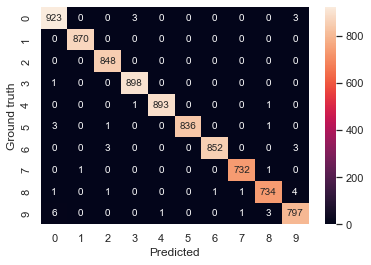

In [23]:
dispConfusionMatrix(y_test, y_pred)

In [24]:
print(classification_report(df_test["class_int"].to_numpy().reshape(-1,),
                           df_test["pred_class"].to_numpy().reshape(-1,)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       929
           1       1.00      1.00      1.00       870
           2       0.99      1.00      1.00       848
           3       1.00      1.00      1.00       899
           4       1.00      1.00      1.00       895
           5       1.00      0.99      1.00       841
           6       1.00      0.99      1.00       858
           7       1.00      1.00      1.00       734
           8       0.99      0.99      0.99       742
           9       0.99      0.99      0.99       808

    accuracy                           1.00      8424
   macro avg       1.00      1.00      1.00      8424
weighted avg       1.00      1.00      1.00      8424



In [25]:
np.where(df_test["class_int"]!=df_test["pred_class"])[0] 
#틀린 것들의 인덱스만 (튜플)

array([ 220,  320,  629,  686,  890,  972, 1041, 1501, 1541, 1561, 1588,
       1902, 1954, 2474, 2491, 2728, 2822, 3372, 3607, 3658, 4425, 4499,
       4723, 4865, 5304, 5604, 5782, 5967, 5988, 6080, 6083, 6198, 6420,
       6450, 6502, 6724, 6779, 6935, 7140, 7626, 7759], dtype=int64)

In [26]:
indices= np.where(df_test["class_int"]!=df_test["pred_class"])[0] 
df_test.iloc[indices].head(20)

,subject,classname,img,class_int,pred_class,pred_prob
18523,p061,c9,d:/Ai/project1/imgs/train/c9/img_21503.jpg,9,4,0.840871
15264,p050,c9,d:/Ai/project1/imgs/train/c9/img_20002.jpg,9,8,0.754548
15365,p051,c0,d:/Ai/project1/imgs/train/c0/img_31121.jpg,0,3,0.983431
20706,p072,c6,d:/Ai/project1/imgs/train/c6/img_55684.jpg,6,2,0.781234
12359,p045,c5,d:/Ai/project1/imgs/train/c5/img_78504.jpg,5,2,0.983148
21210,p075,c5,d:/Ai/project1/imgs/train/c5/img_44224.jpg,5,0,0.974963
15253,p050,c8,d:/Ai/project1/imgs/train/c8/img_46528.jpg,8,9,0.979680
20705,p072,c6,d:/Ai/project1/imgs/train/c6/img_29293.jpg,6,2,0.528217
15833,p051,c5,d:/Ai/project1/imgs/train/c5/img_19127.jpg,5,0,0.557495
2347,p014,c8,d:/Ai/project1/imgs/train/c8/img_31158.jpg,8,9,0.898789


In [27]:
df_test.iloc[indices].classname.value_counts()

c9    11
c8     8
c0     6
c6     6
c5     5
c4     2
c7     2
c3     1
Name: classname, dtype: int64

In [32]:
coun=df_test.iloc[indices].classname.value_counts()

In [38]:
coun.sum()

41

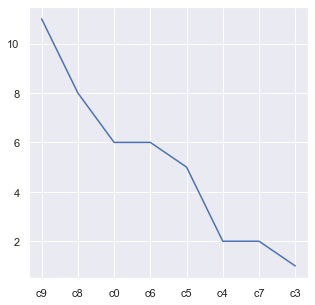

In [35]:
plt.plot(coun)

<BarContainer object of 8 artists>

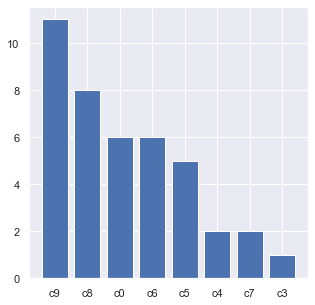

In [36]:
plt.bar(coun.index, coun)

영상수:  8424  오답수:  41


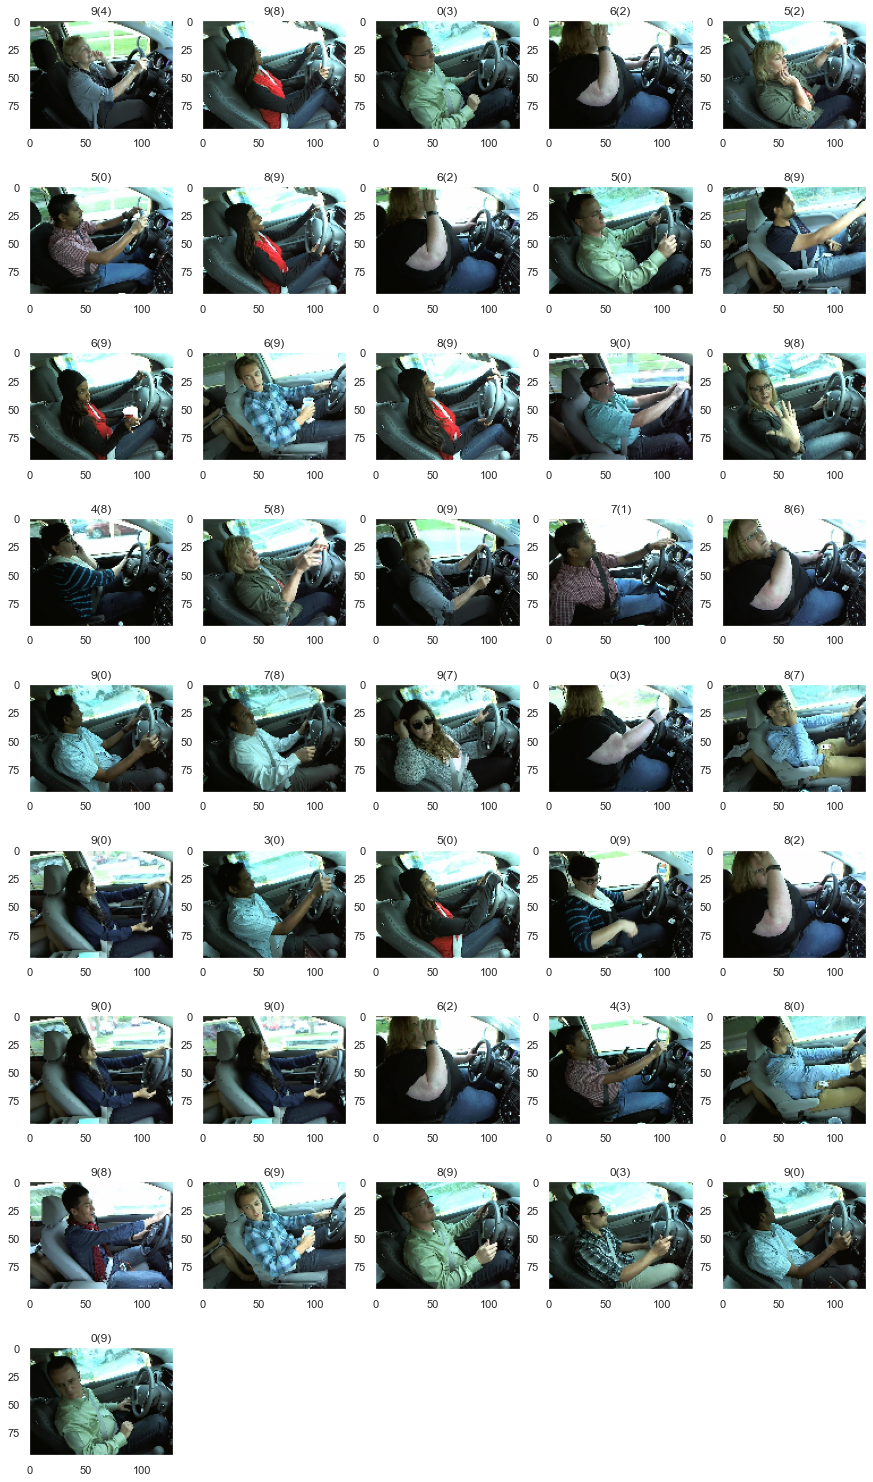

<Figure size 1080x2160 with 0 Axes>

<Figure size 1080x2160 with 0 Axes>

<Figure size 1080x2160 with 0 Axes>

<Figure size 1080x2160 with 0 Axes>

In [29]:
skip=50
print("영상수: ",len(df_test), " 오답수: ", len(indices) )
for k in range(5):
    skip = 50*k
    plt.figure(figsize=(15, 30))
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    for i, idx in enumerate(indices[skip: skip+50]):
        path=df_test.iloc[idx,2]
        plt.subplot(10, 5, i+1)
        view_image = plt.imread(path) 
        view_image = cv2.resize(view_image, (128, 96))
        plt.imshow(view_image)
        plt.xticks=([])
        plt.yticks=([])
        plt.grid(False)
        plt.title(str(df_test.iloc[idx, 3])
                  + '(' +str(df_test.iloc[idx,4])+')')
    plt.show()